## Linear Regression - King County Housing Data Project


* Student name: Mark Ehler
* Student pace: Part time
* Scheduled project review date/time: 7:00pm MST January 31st 2019
* Instructor name: Jeff Herman
* Blog post URL: https://drive.google.com/open?id=1Z0LQF7mV0hqK5YQILxJDjVxEX7ZaQTM6Nd_8vWIoLPs
* Presentation Link: https://drive.google.com/open?id=1CZGbw6_0HvDsu18WgKTVVQa_DYrnMDzugeoj5zjb-A4


The following is a work up for a data set regarding housing data for King County, the greater Seattle area.

In [94]:
import pandas as pd
import numpy as np

df = pd.read_csv("kc_house_data.csv")
df = df.drop(['id'], axis=1)
df.head(3)
#condition is on a scale of 1-5

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062


In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 20 columns):
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(10), object(2)
memory usage: 3.3+ MB


In [96]:
df.date = pd.to_datetime(df.date)
print(df.date.min(), df.date.max())

2014-05-02 00:00:00 2015-05-27 00:00:00


In [97]:
type(df.sqft_basement.iloc[2])

str

In [98]:
df.sqft_basement = df.sqft_basement.convert_objects(convert_numeric=True)
df.sqft_basement.dtypes

C:\Users\Mark\AppData\Local\Continuum\anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.


dtype('float64')

In [99]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21143.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,291.851724,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,442.498337,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [100]:
np.sum(df.isna())

date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement     454
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [101]:
df[df.view.isna() == True].head()


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7,2015-01-15,291850.0,3,1.50,1060,9711,1.0,0.0,NaN,3,7,1060,0.0,1963,0.0,98198,47.4095,-122.315,1650,9711
114,2014-10-28,480000.0,4,2.50,3230,16171,2.0,0.0,NaN,3,9,2520,710.0,2001,0.0,98001,47.3183,-122.253,2640,8517
129,2015-04-06,430000.0,4,2.50,2070,4310,2.0,0.0,NaN,3,7,2070,0.0,2004,0.0,98065,47.5319,-121.850,1970,3748
205,2014-08-04,840000.0,4,1.75,2480,11010,1.0,0.0,NaN,4,9,1630,850.0,1966,NaN,98040,47.5378,-122.219,2770,10744
487,2014-07-21,207950.0,2,2.00,890,5000,1.0,0.0,NaN,3,6,890,0.0,1917,0.0,98118,47.5158,-122.264,1860,5000


In [102]:
df.view.unique()

array([ 0., nan,  3.,  4.,  2.,  1.])

View mean = 0.22
It's safe to assume assume the nans as 0s

In [103]:
df.view = df.view.fillna(0)
df.sqft_basement = df.sqft_basement.fillna(0)
print(df.sqft_basement[df.sqft_basement < 3].unique())

[0.]


In [104]:
df.waterfront.unique()

array([nan,  0.,  1.])

Waterfront mean =  0.007

In [105]:
df.waterfront = df.view.fillna(0)

In [106]:
df.yr_renovated.unique()

array([   0., 1991.,   nan, 2002., 2010., 1992., 2013., 1994., 1978.,
       2005., 2003., 1984., 1954., 2014., 2011., 1983., 1945., 1990.,
       1988., 1977., 1981., 1995., 2000., 1999., 1998., 1970., 1989.,
       2004., 1986., 2007., 1987., 2006., 1985., 2001., 1980., 1971.,
       1979., 1997., 1950., 1969., 1948., 2009., 2015., 1974., 2008.,
       1968., 2012., 1963., 1951., 1962., 1953., 1993., 1996., 1955.,
       1982., 1956., 1940., 1976., 1946., 1975., 1964., 1973., 1957.,
       1959., 1960., 1967., 1965., 1934., 1972., 1944., 1958.])

In [107]:
df.yr_renovated.describe()

count    17755.000000
mean        83.636778
std        399.946414
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       2015.000000
Name: yr_renovated, dtype: float64

The null values are one thing, but the 0s are another problem.  How do you pick a year if what 0s likely representing housing that has not been renovated?  rather than converting the 0s to the mean.  Let's bin this data and clearly mark the 0s in a class of their own.

In [108]:
df.yr_renovated = df.yr_renovated.fillna(0)
df.isna().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [109]:
original_price = df.price



Let's visualize and scale our formats.

In [110]:
import seaborn as sns
import matplotlib.pyplot as plt
continuous_df = df.drop(['bedrooms', 'date',  'bathrooms', 'floors', 'waterfront', 'view', 'condition',
       'grade', 'yr_built', 'yr_renovated', 'zipcode', 'price'], axis=1)



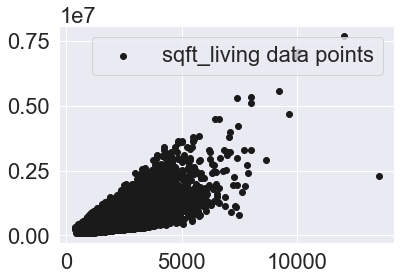

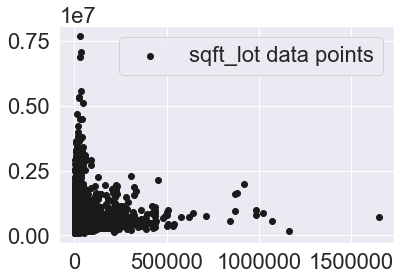

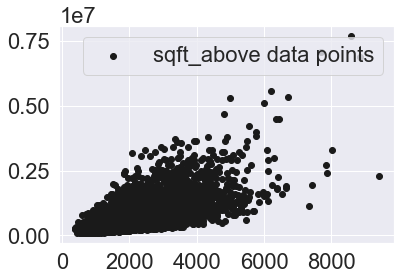

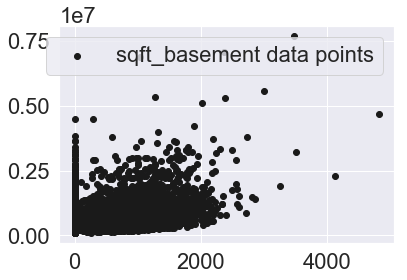

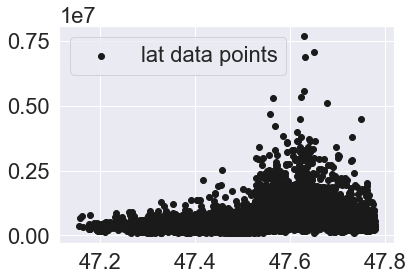

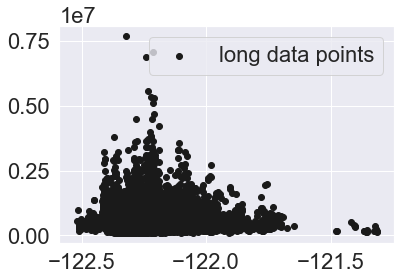

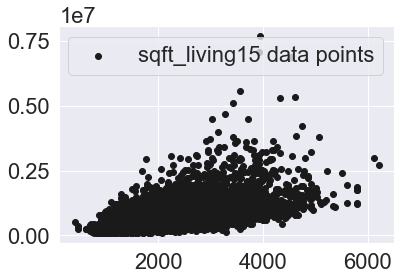

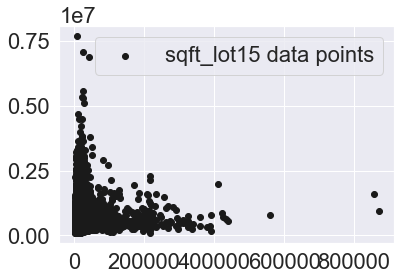

In [111]:


'''for col in continuous_df.columns:
    sns.distplot(continuous_df[col], kde=True)'''

for column in continuous_df.columns:
    plt.scatter(continuous_df[column], original_price, label=column + " data points", color='k')
    plt.legend()
    plt.show()

###

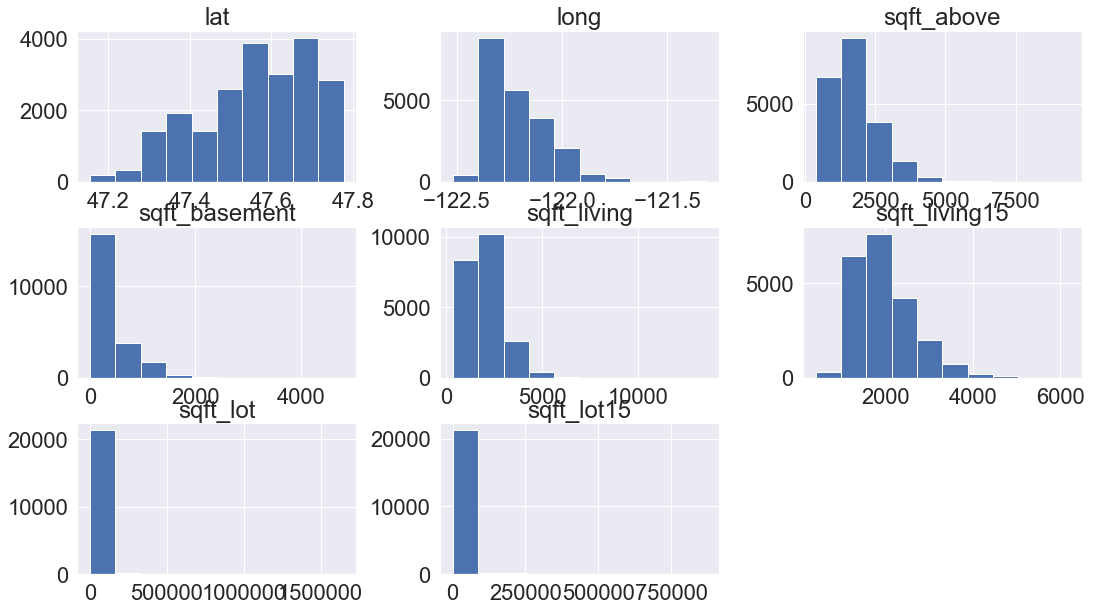

In [112]:
continuous_df.hist(figsize=(18,10) );

###

C:\Users\Mark\AppData\Local\Continuum\anaconda3\envs\learn-env\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


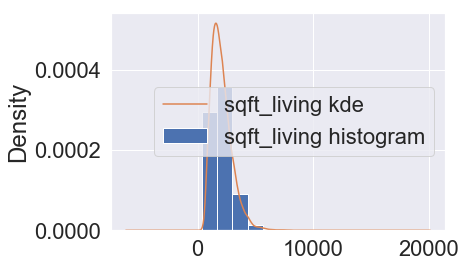

C:\Users\Mark\AppData\Local\Continuum\anaconda3\envs\learn-env\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


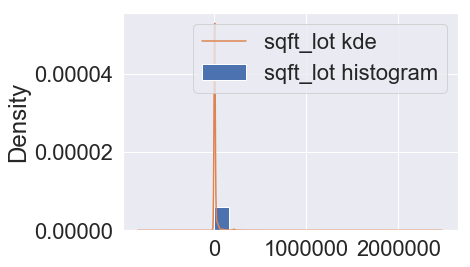

C:\Users\Mark\AppData\Local\Continuum\anaconda3\envs\learn-env\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


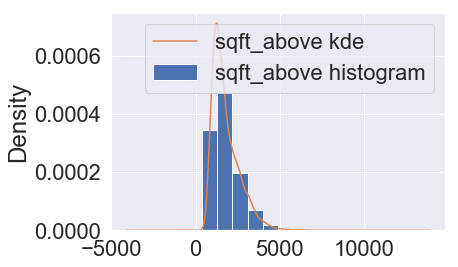

C:\Users\Mark\AppData\Local\Continuum\anaconda3\envs\learn-env\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


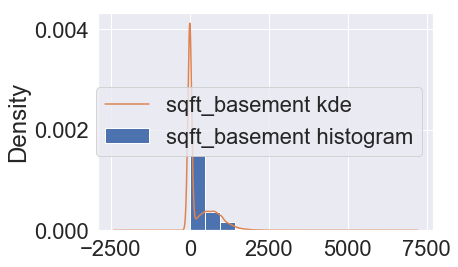

C:\Users\Mark\AppData\Local\Continuum\anaconda3\envs\learn-env\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


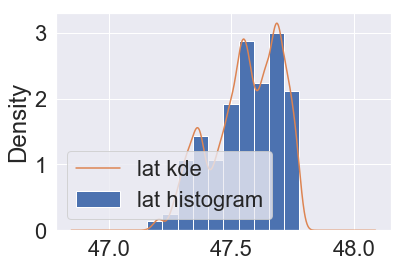

C:\Users\Mark\AppData\Local\Continuum\anaconda3\envs\learn-env\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


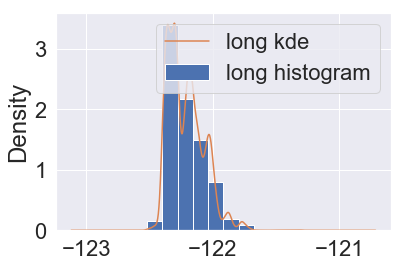

C:\Users\Mark\AppData\Local\Continuum\anaconda3\envs\learn-env\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


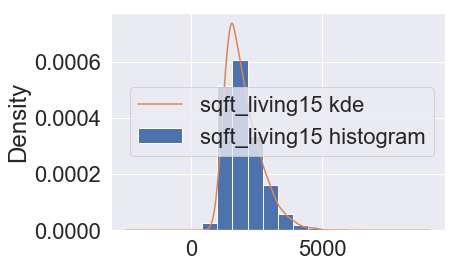

C:\Users\Mark\AppData\Local\Continuum\anaconda3\envs\learn-env\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


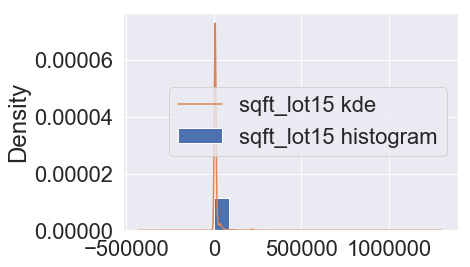

In [113]:
for column in continuous_df:
    continuous_df[column].plot.hist(normed=True, label = column+' histogram')
    continuous_df[column].plot.kde(label =column+' kde')
    plt.legend()
    plt.show()
    


In [114]:
###

In [115]:
continuous_df.columns

Index(['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

We can see some wild outliers here by looking at the kde plot tails.  There have been some outliers in the case of the categories as well.  it's time we started dealing with them.

In [116]:

cleaning = df.copy()
cleaning.columns
cleaning.isna().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [117]:
cleaning.loc[cleaning['sqft_lot'] == max(cleaning['sqft_lot'])]
cleaning.loc[cleaning['bedrooms'] == max(cleaning['bedrooms'])]
cleaning.loc[cleaning['price'] == max(cleaning['price'])]
for col in cleaning:
    print(col, cleaning[col].unique().max())



date 2015-05-27T00:00:00.000000000
price 7700000.0
bedrooms 33
bathrooms 8.0
sqft_living 13540
sqft_lot 1651359
floors 3.5
waterfront 4.0
view 4.0
condition 5
grade 13
sqft_above 9410
sqft_basement 4820.0
yr_built 2015
yr_renovated 2015.0
zipcode 98199
lat 47.7776
long -121.315
sqft_living15 6210
sqft_lot15 871200


###

In [118]:
cleaning.loc[cleaning['bedrooms'] == max(cleaning['bedrooms'])]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15856,2014-06-25,640000.0,33,1.75,1620,6000,1.0,0.0,0.0,5,7,1040,580.0,1947,0.0,98103,47.6878,-122.331,1330,4700


33 bedrooms on 1600 square feet.  Right.  So the question is do I replace the '33' with what is more likely a '3' or do I remove the whole row.  In this case, I believe that this unit with 3 beds could be worth 640 thousand. I'll replace.

###

In [119]:
cleaning['bedrooms'] = cleaning['bedrooms'].replace(33,3)


In [120]:
cleaning.loc[df['sqft_living'] == max(cleaning['sqft_living'])]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
12764,2014-05-05,2280000.0,7,8.0,13540,307752,3.0,4.0,4.0,3,12,9410,4130.0,1999,0.0,98053,47.6675,-121.986,4850,217800


If anything the price is too low.  Looking at the price data it is an outlier in that regard so I think it's best to drop this row.


###

In [121]:
#scaled = scaled.drop([12764])


###

In [122]:
cleaning.loc[cleaning['bathrooms'] == max(cleaning['bathrooms'])]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7245,2014-10-13,7700000.0,6,8.0,12050,27600,2.5,3.0,3.0,4,13,8570,3480.0,1910,1987.0,98102,47.6298,-122.323,3940,8800
12764,2014-05-05,2280000.0,7,8.0,13540,307752,3.0,4.0,4.0,3,12,9410,4130.0,1999,0.0,98053,47.6675,-121.986,4850,217800


These people could house a family in their bathrooms

In [123]:
cleaning.loc[cleaning['sqft_basement'] == max(cleaning['sqft_basement'])]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
8085,2014-06-17,4670000.0,5,6.75,9640,13068,1.0,4.0,4.0,3,12,4820,4820.0,1983,2009.0,98040,47.557,-122.21,3270,10454


Why would you get property on Lake Washington and put half of your house underground.  As much as this doesn't make sense, I have no good reason to judge what rich eccentrics do with their money.  Maybe this is Elon Musk's bomb shelter.


At this point I've had my fun snooping and can't think of anything else at the moment to spy on.

In [124]:
cleaning.loc[cleaning['sqft_lot15'] == max(cleaning['sqft_lot15'])]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
9705,2015-01-07,937500.0,4,4.0,5545,871200,2.0,0.0,0.0,3,11,3605,1940.0,2003,0.0,98014,47.676,-121.882,3420,871200


I looked this GPS up and found it to be way off the road in Carnation, WA.  It's east of Bellevue,  east of Redmond.  This location hardly seems relative so we will clean it.

In [125]:
#scaled = scaled.drop([0,9705])


In [126]:
cleaning.isna().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [127]:
cleaning.loc[cleaning['sqft_lot15'] == max(cleaning['sqft_lot15'])]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
9705,2015-01-07,937500.0,4,4.0,5545,871200,2.0,0.0,0.0,3,11,3605,1940.0,2003,0.0,98014,47.676,-121.882,3420,871200


In [128]:
cleaning.zipcode[cleaning.zipcode == 98014].value_counts()

98014    124
Name: zipcode, dtype: int64

Another unnamed road in West Caranation.

In [129]:
#cleaning = cleaning.drop([20436])


In [130]:
cleaning.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,5.402966e+05,3.371811,2.115826,2080.321850,1.509941e+04,1.494096,0.233181,0.233181,3.409825,7.657915,1788.596842,285.716581,1970.999676,68.758207,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,3.673681e+05,0.904096,0.768984,918.106125,4.141264e+04,0.539683,0.764673,0.764673,0.650546,1.173200,827.759761,439.819830,29.375234,364.037499,53.513072,0.138552,0.140724,685.230472,27274.441950
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,550.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,11.000000,8.000000,13540.000000,1.651359e+06,3.500000,4.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [131]:
limit = cleaning.price.mean() + (2 * cleaning.price.std())
limit

1275032.8537083685

In [132]:
cleaned = cleaning[(cleaning.price <= limit) & (cleaning.bathrooms < 9) & (cleaning.sqft_lot15 < 50000)]
cleaned_price = cleaned.price


In [133]:
cleaned.shape

(20113, 20)

In [134]:
cleaned.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.011300e+04,20113.000000,20113.000000,20113.000000,2.011300e+04,20113.000000,20113.000000,20113.000000,20113.000000,20113.000000,20113.000000,20113.000000,20113.000000,20113.000000,20113.000000,20113.000000,20113.000000,20113.000000,20113.000000
mean,4.852295e+05,3.340377,2.057960,1980.266991,1.034954e+04,1.479938,0.178143,0.178143,3.407348,7.546761,1707.921146,266.863123,1970.543231,62.111619,98079.509471,47.559843,-122.218894,1924.257396,8761.673544
std,2.241934e+05,0.891146,0.716827,785.463789,2.100544e+04,0.538755,0.655082,0.655082,0.647942,1.052525,731.342690,409.921193,29.376747,346.564367,53.636129,0.139116,0.137544,625.849223,7119.839069
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.514000,460.000000,651.000000
25%,3.150000e+05,3.000000,1.500000,1400.000000,5.000000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1170.000000,0.000000,1951.000000,0.000000,98033.000000,47.469400,-122.331000,1470.000000,5000.000000
50%,4.390000e+05,3.000000,2.000000,1860.000000,7.410000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1510.000000,0.000000,1974.000000,0.000000,98072.000000,47.569800,-122.241000,1800.000000,7485.000000
75%,6.100000e+05,4.000000,2.500000,2440.000000,1.000000e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2100.000000,510.000000,1996.000000,0.000000,98118.000000,47.680000,-122.133000,2280.000000,9660.000000
max,1.270000e+06,11.000000,7.500000,7480.000000,1.164794e+06,3.500000,4.000000,4.000000,5.000000,12.000000,7320.000000,2720.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,5790.000000,49783.000000


In [135]:
continuous_df = cleaned.drop(['bedrooms', 'date',  'bathrooms', 'floors', 'waterfront', 'view', 'condition',
       'grade', 'yr_built', 'yr_renovated', 'zipcode', 'price'], axis=1)

normalizing = cleaned.copy()

Let's replot our visualizations and scale them and see how things have changed.

C:\Users\Mark\AppData\Local\Continuum\anaconda3\envs\learn-env\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


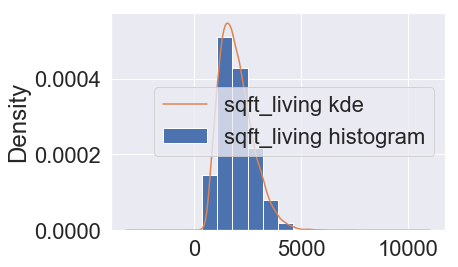

C:\Users\Mark\AppData\Local\Continuum\anaconda3\envs\learn-env\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


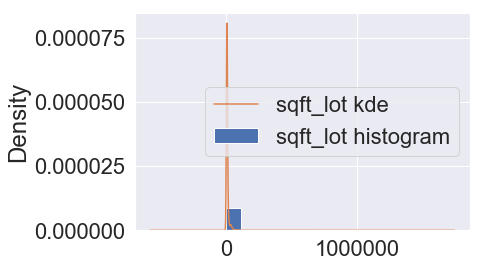

C:\Users\Mark\AppData\Local\Continuum\anaconda3\envs\learn-env\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


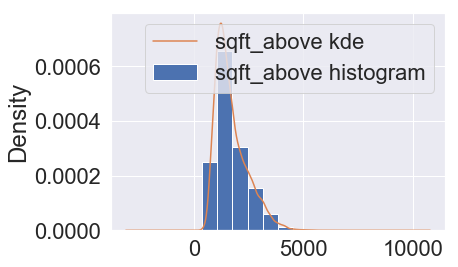

C:\Users\Mark\AppData\Local\Continuum\anaconda3\envs\learn-env\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


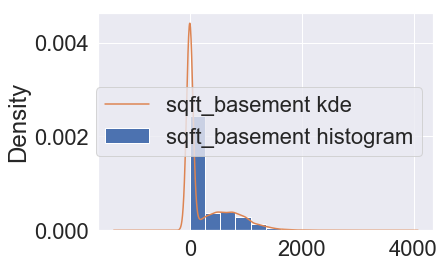

C:\Users\Mark\AppData\Local\Continuum\anaconda3\envs\learn-env\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


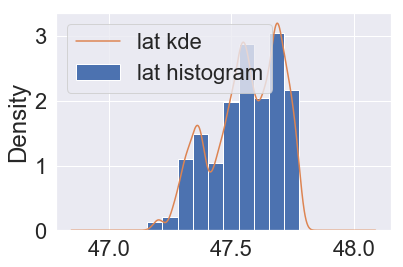

C:\Users\Mark\AppData\Local\Continuum\anaconda3\envs\learn-env\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


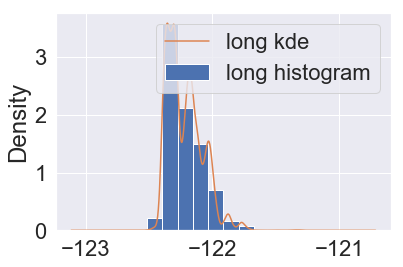

C:\Users\Mark\AppData\Local\Continuum\anaconda3\envs\learn-env\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


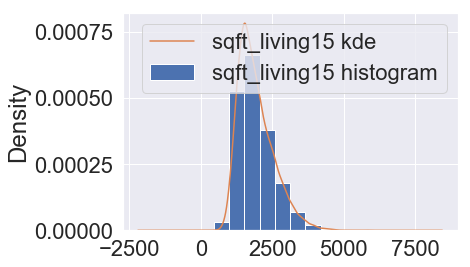

C:\Users\Mark\AppData\Local\Continuum\anaconda3\envs\learn-env\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


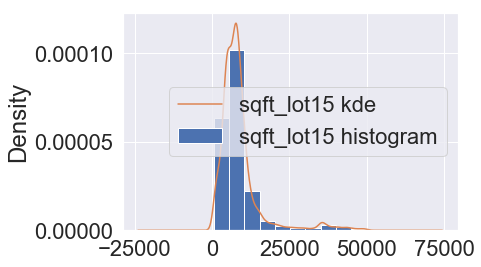

In [136]:
import matplotlib.pyplot as plt
for column in continuous_df:
    normalizing[column].plot.hist(normed=True, label = column+' histogram')
    normalizing[column].plot.kde(label =column+' kde')

    
    plt.legend()
    plt.show()

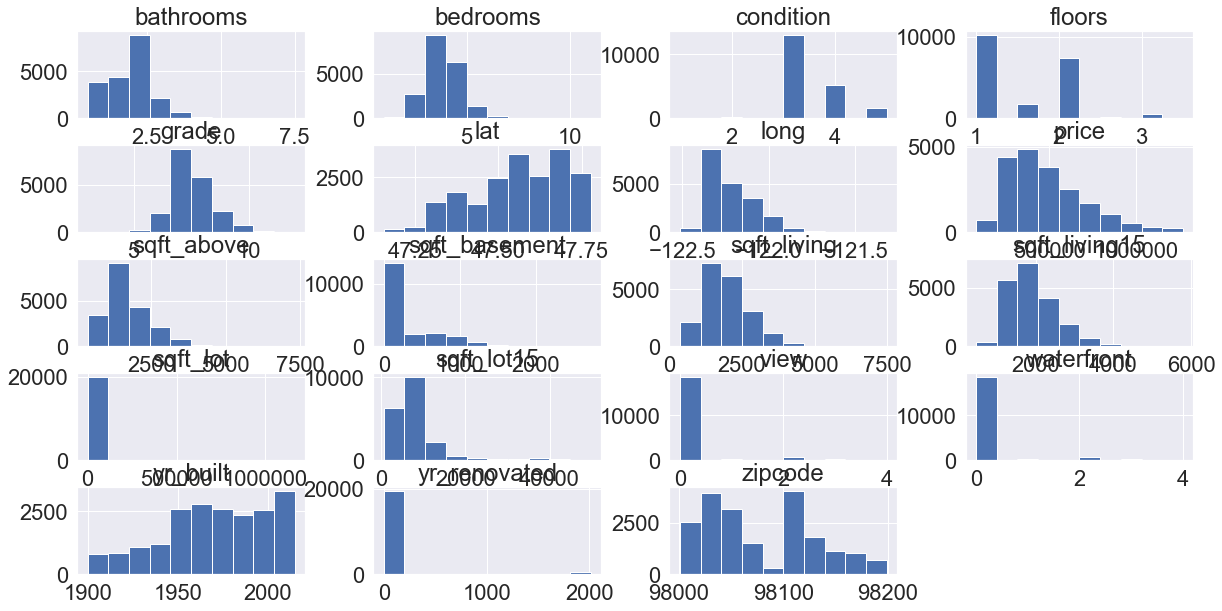

In [137]:
normalizing.hist(figsize=(20,10) );

In [138]:
normalizing['sqft_living'] = np.log(normalizing['sqft_living'])

C:\Users\Mark\AppData\Local\Continuum\anaconda3\envs\learn-env\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


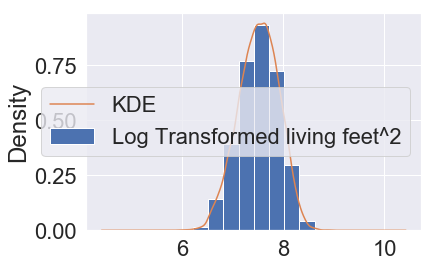

In [139]:
#make side by side comparison
#fig, ax = 


normalizing['sqft_living'].plot.hist(normed=True, label='Log Transformed living feet^2')
normalizing['sqft_living'].plot.kde(label = "KDE")
plt.legend()
plt.show()


###

There are a lot of values that equal zero in basements.  Lets change those to 1s, they will still be statistically insignificant and will allow us to log transform that column.

C:\Users\Mark\AppData\Local\Continuum\anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


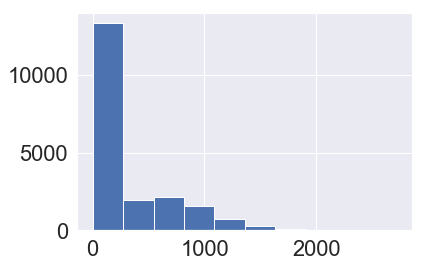

In [140]:
normalizing['sqft_basement'][normalizing['sqft_basement'] == 0] = 1
normalizing.sqft_basement.hist()


In [141]:
normalizing['sqft_basement'] = np.log(normalizing['sqft_basement'])
normalizing['sqft_lot'] = np.log(normalizing['sqft_lot'])
normalizing['sqft_living15'] = np.log(normalizing['sqft_living15'])
normalizing['sqft_lot15'] = np.log(normalizing['sqft_lot15'])
normalizing['sqft_above'] = np.log(normalizing['sqft_above'])



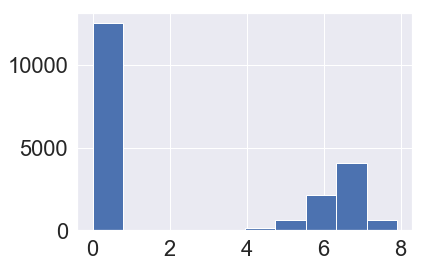

In [142]:
normalizing.sqft_basement.hist()

Likely I will have to further deal with this one as categorical data.  Let's drop it from this the normalizing df.

In [143]:
normalizing = normalizing.drop(['sqft_basement', 'bathrooms', 'date', 'lat', 'long', 'zipcode', 'floors', 'condition', 'bedrooms', 'grade', 'price', 'view', 'waterfront', 'yr_built', 'yr_renovated'], axis=1)

In [144]:
#making a copy of my geo data here...?
geo_data = cleaned[['lat', 'long', 'zipcode']].copy()



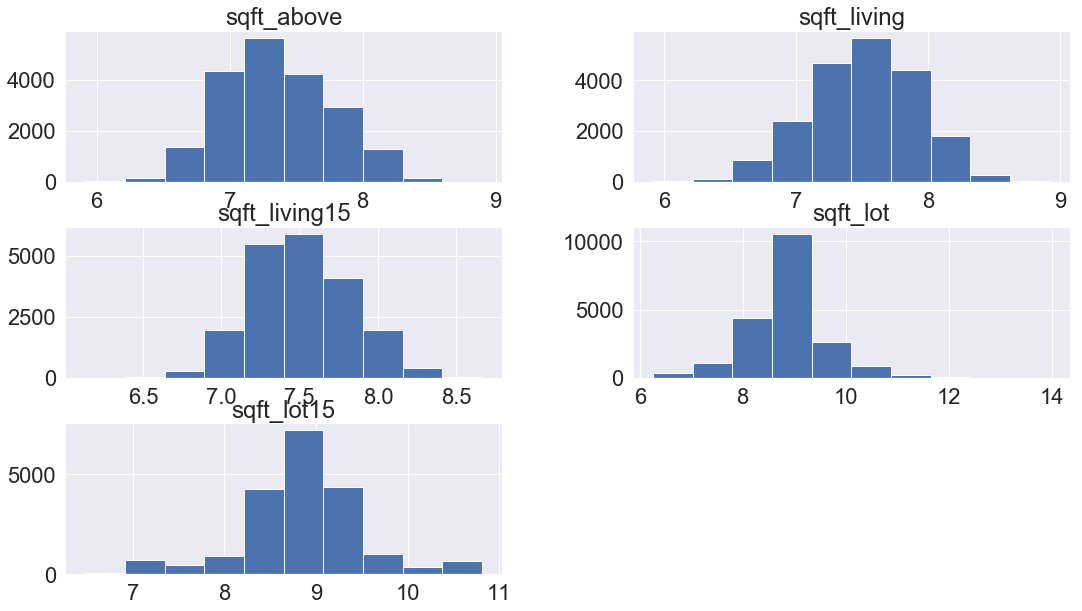

In [145]:
normalizing.hist(figsize=(18,10) );

In [146]:
normalized = normalizing

multicoll_check = normalized

abs(multicoll_check.corr()) > 0.75

#check to see if sqft above are strongly corr with price




,sqft_living,sqft_lot,sqft_above,sqft_living15,sqft_lot15
sqft_living,True,False,True,False,False
sqft_lot,False,True,False,False,True
sqft_above,True,False,True,False,False
sqft_living15,False,False,False,True,False
sqft_lot15,False,True,False,False,True


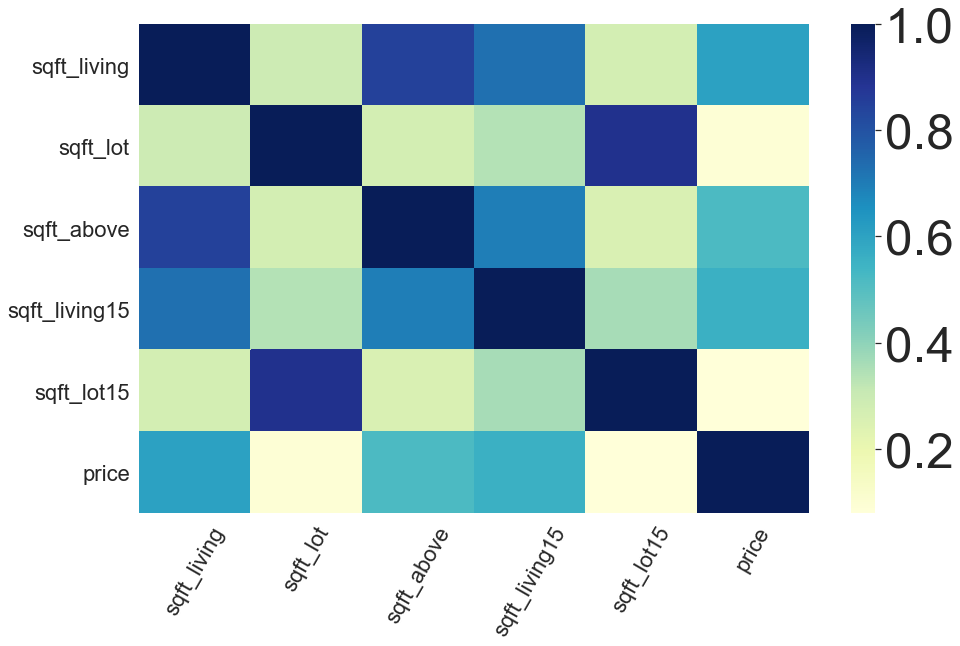

In [147]:
import matplotlib.pyplot as plt
import seaborn as sns
f, ax = plt.subplots(figsize=(15,9))
sns.set(font_scale=4.5)

multicoll_check_price = pd.concat([multicoll_check, cleaned_price], axis = 1)

bluemap = sns.heatmap(multicoll_check_price.corr(), cmap="YlGnBu")
for i in bluemap.get_xticklabels():
    i.set_rotation(60)

In [148]:
multicoll_check_price.corr()

,sqft_living,sqft_lot,sqft_above,sqft_living15,sqft_lot15,price
sqft_living,1.000000,0.294900,0.848294,0.728279,0.276438,0.606005
sqft_lot,0.294900,1.000000,0.275272,0.341950,0.898319,0.091710
sqft_above,0.848294,0.275272,1.000000,0.695737,0.259044,0.520194
sqft_living15,0.728279,0.341950,0.695737,1.000000,0.362407,0.558058
sqft_lot15,0.276438,0.898319,0.259044,0.362407,1.000000,0.079667
price,0.606005,0.091710,0.520194,0.558058,0.079667,1.000000


In [149]:
multicoll_check = multicoll_check.drop(['sqft_above'], axis=1)

In [150]:
scaling = multicoll_check

#
scaling['sqft_living'] =  (scaling['sqft_living'] - scaling['sqft_living'].min()) / (scaling['sqft_living'].max() - scaling['sqft_living'].min())
scaling['sqft_lot'] =  (scaling['sqft_lot'] - scaling['sqft_lot'].min()) / (scaling['sqft_lot'].max() - scaling['sqft_lot'].min())
scaling['sqft_living15'] =  (scaling['sqft_living15'] - scaling['sqft_living15'].min()) / (scaling['sqft_living15'].max() - scaling['sqft_living15'].min())


#


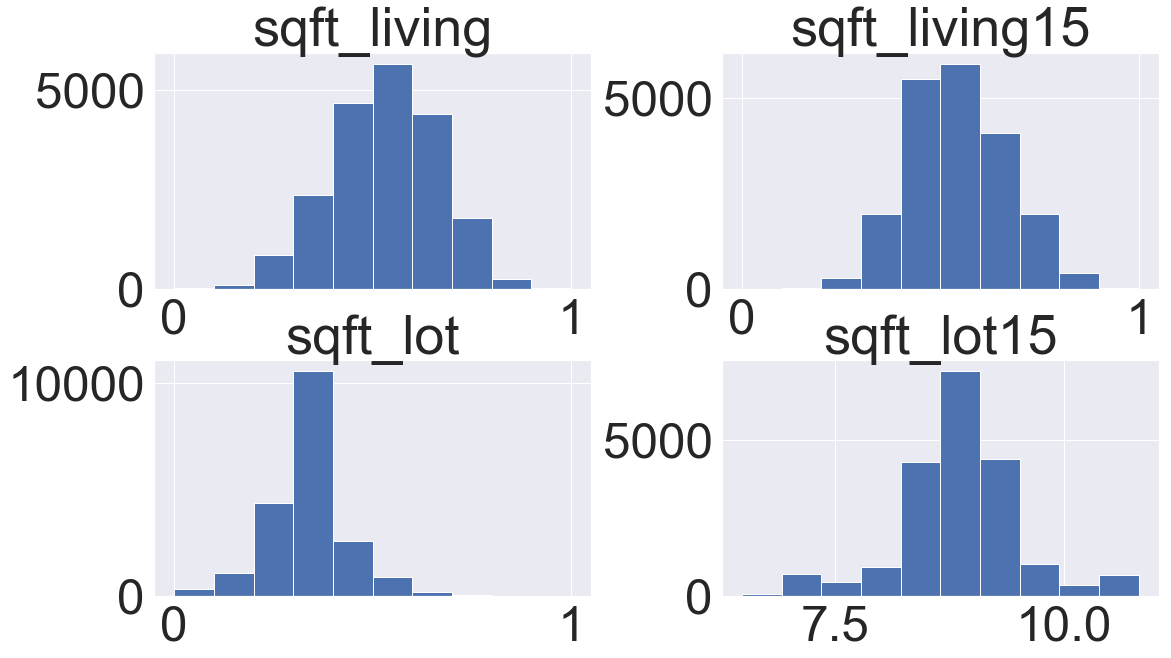

In [151]:
scaling.hist(figsize=(18,10) );

In [152]:
scaled = scaling


We have quite a few categories in our dataframe.  Let's handle those.

In [153]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [154]:
ordinal = cleaned[['bedrooms', 'bathrooms', 'floors', 'sqft_basement', 'waterfront', 'view', 'condition', 'grade']]

abs(ordinal.corr()) > 0.75

,bedrooms,bathrooms,floors,sqft_basement,waterfront,view,condition,grade
bedrooms,True,False,False,False,False,False,False,False
bathrooms,False,True,False,False,False,False,False,False
floors,False,False,True,False,False,False,False,False
sqft_basement,False,False,False,True,False,False,False,False
waterfront,False,False,False,False,True,True,False,False
view,False,False,False,False,True,True,False,False
condition,False,False,False,False,False,False,True,False
grade,False,False,False,False,False,False,False,True


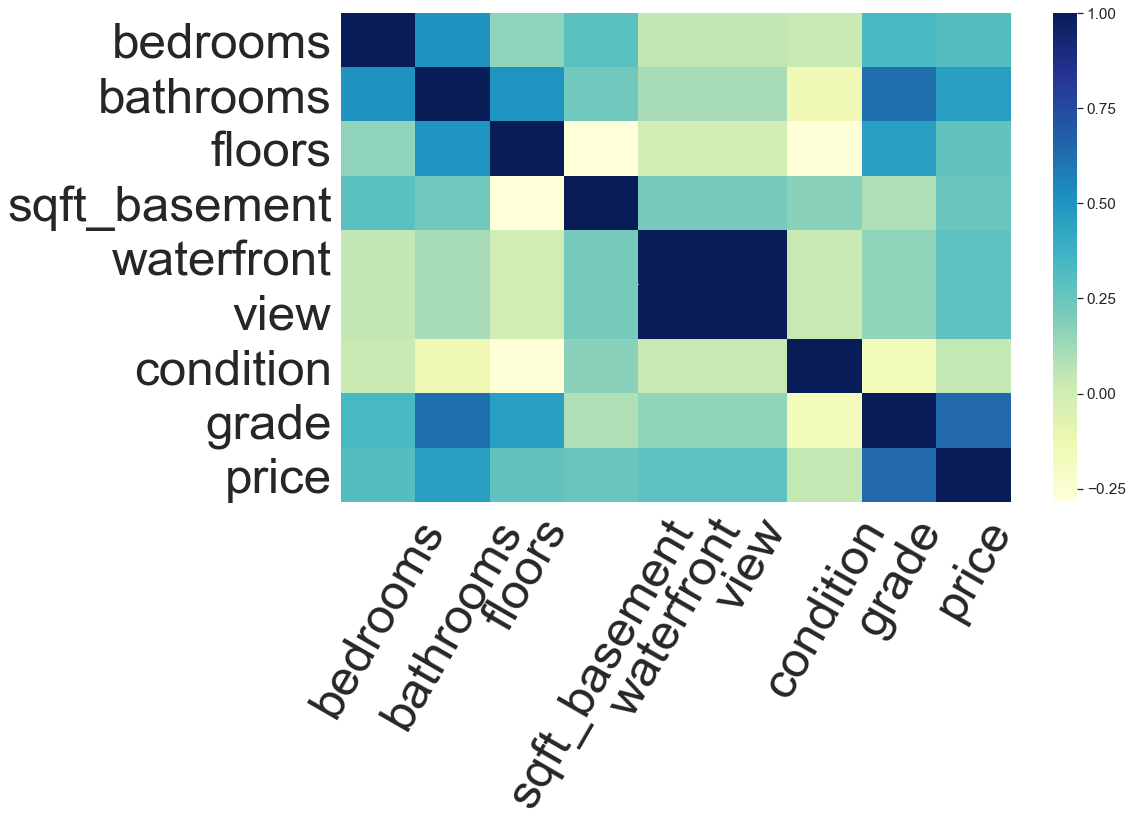

In [155]:
ordinal_check = pd.concat([ordinal,cleaned_price], axis=1)


f, ax = plt.subplots(figsize=(15,9))
sns.set(font_scale=1.4)

bluemap = sns.heatmap(ordinal_check.corr(), cmap="YlGnBu")
for i in bluemap.get_xticklabels():
    i.set_rotation(60)

In [156]:
ordinal_check.corr()

,bedrooms,bathrooms,floors,sqft_basement,waterfront,view,condition,grade,price
bedrooms,1.000000,0.511633,0.162784,0.290775,0.049437,0.049437,0.020950,0.339262,0.309343
bathrooms,0.511633,1.000000,0.504531,0.227895,0.109520,0.109520,-0.136852,0.619287,0.461255
floors,0.162784,0.504531,1.000000,-0.286218,-0.007906,-0.007906,-0.275845,0.457283,0.272676
sqft_basement,0.290775,0.227895,-0.286218,1.000000,0.218331,0.218331,0.173125,0.091482,0.253912
waterfront,0.049437,0.109520,-0.007906,0.218331,1.000000,1.000000,0.033792,0.158574,0.277671
view,0.049437,0.109520,-0.007906,0.218331,1.000000,1.000000,0.033792,0.158574,0.277671
condition,0.020950,-0.136852,-0.275845,0.173125,0.033792,0.033792,1.000000,-0.165838,0.042656
grade,0.339262,0.619287,0.457283,0.091482,0.158574,0.158574,-0.165838,1.000000,0.643441
price,0.309343,0.461255,0.272676,0.253912,0.277671,0.277671,0.042656,0.643441,1.000000


In [157]:
ordinal = ordinal.drop(['view'], axis = 1)


In [158]:
ordinal.head()

,bedrooms,bathrooms,floors,sqft_basement,waterfront,condition,grade
0,3,1.00,1.0,0.0,0.0,3,7
1,3,2.25,2.0,400.0,0.0,3,7
2,2,1.00,1.0,0.0,0.0,3,6
3,4,3.00,1.0,910.0,0.0,5,7
4,3,2.00,1.0,0.0,0.0,3,8


In [159]:
categories = pd.concat([cleaned[['yr_built', 'yr_renovated', 'zipcode']], ordinal], axis=1)


for col in categories.columns:
    categories[col] = categories[col].astype('category')

categories.head()

,yr_built,yr_renovated,zipcode,bedrooms,bathrooms,floors,sqft_basement,waterfront,condition,grade
0,1955,0.0,98178,3,1.00,1.0,0.0,0.0,3,7
1,1951,1991.0,98125,3,2.25,2.0,400.0,0.0,3,7
2,1933,0.0,98028,2,1.00,1.0,0.0,0.0,3,6
3,1965,0.0,98136,4,3.00,1.0,910.0,0.0,5,7
4,1987,0.0,98074,3,2.00,1.0,0.0,0.0,3,8


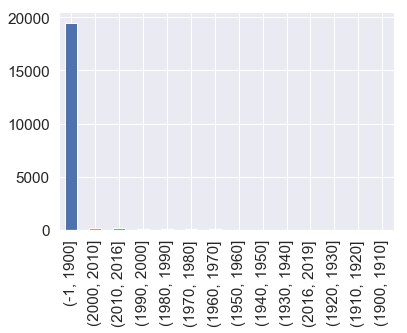

In [160]:
#bining yr_build and yr_renovated

built_bins = [1900, 1910, 1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010, 2016, 2019]
renovated_bins = [-1] + built_bins

built = pd.cut(categories['yr_built'], built_bins)
renovated = pd.cut(categories['yr_renovated'], renovated_bins)
built = built.cat.as_unordered()
renovated = renovated.cat.as_unordered()

renovated.value_counts().plot(kind='bar')


Whoa! So, the vast majority of houses have not been renovated.
I should have caught that earlier but this poses an interesting question.
Should the 0s be thrown out. ploted w/o zeros we a few relevant details
We could also condense renovated into is/is-not renovated category.

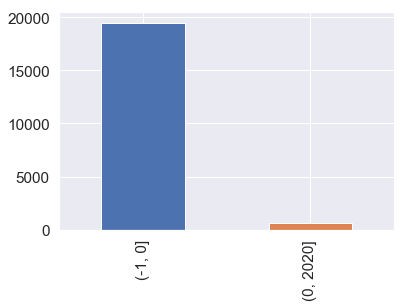

In [161]:
renovated_bins = [-1,0,2020]
renovated = pd.cut(categories['yr_renovated'], renovated_bins)
renovated = renovated.cat.as_unordered()
renovated.value_counts().plot(kind='bar')
#Still pretty overwhelming, but lets go with it, maybe renovation will have affect on the price.

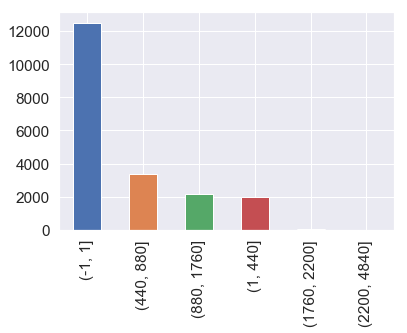

In [162]:
basement_bins = [-1,1,440,880,1760,2200,4840]
basement = pd.cut(categories['sqft_basement'], basement_bins)
basement = basement.cat.as_unordered()
basement.value_counts().plot(kind='bar')


Let's set up some dummy variables.

In [163]:
#DON'T run this cell.  Lots of failed attempts

'''
for idx, col in enumerate(categories):
    categories[col] = pd.get_dummies(categories[col], prefix=[col], drop_first=True)
categories.columns

I tried to create a for loop that takes each column of the df and makes it it's own df(list of a single/all dfs)
and then gets dummies and
concats those dfs back into one big_ole cat df


for idx, col in enumerate(categories):
    print(idx, col)
    
df_list = []
#maybe needs a counter to store the dfs before offloading into a new df
for idx, col in enumerate(categories):
    i = pd.DataFrame(categories[col])
    i = pd.get_dummies(categories[col], prefix=col, drop_first=True)
    df_list.append(i)
'''

#my attempt at a f(x) get dummies and eventually convert the series to a df of the new categories  

'''
for idx, col in enumerate(categories):
    bins = list(categories[k].unique())
    bins.append(0)
    #would like a for loop to do everything for me but cant get this code to work
    binned = pd.cut(categories.columns[idx], bins)
    binned = binned.cat.as_unordered()
    result = pd.get_dummies(binned, prefix=col, drop_first=False)
    spread.join(result)
'''
    

'\nfor idx, col in enumerate(categories):\n    bins = list(categories[k].unique())\n    bins.append(0)\n    #would like a for loop to do everything for me but cant get this code to work\n    binned = pd.cut(categories.columns[idx], bins)\n    binned = binned.cat.as_unordered()\n    result = pd.get_dummies(binned, prefix=col, drop_first=False)\n    spread.join(result)\n'

In [164]:
spread_categories = pd.DataFrame().reindex_like(categories)

def bining(series):
    bins = list(series.unique())
    bins = [-1] + bins
    bins.sort()
    return bins
    
print(bining(categories['bathrooms']))



[-1, 0.5, 0.75, 1.0, 1.25, 1.5, 1.75, 2.0, 2.25, 2.5, 2.75, 3.0, 3.25, 3.5, 3.75, 4.0, 4.25, 4.5, 4.75, 5.0, 5.25, 5.5, 5.75, 6.0, 6.5, 6.75, 7.5]


# QQPLOT THROWS ERROR HERE ^#
 - might consider relaxing the bins or deleting very small subsamples

In [165]:
'''
def make_dummies(series):
    processing = pd.cut(categories.series, bining(categories.series))
    processing = processing.cat.as_unordered()
    processed = pd.get_dummies(processing, prefix=str(series), drop_first=True)
    return processed
'''

beds = pd.cut(categories.bedrooms, bining(categories.bedrooms))
beds = beds.cat.as_unordered()
beds = pd.get_dummies(beds, prefix='beds', drop_first=True)
spread_categories = beds

spread_categories.columns

Index(['beds_(1, 2]', 'beds_(2, 3]', 'beds_(3, 4]', 'beds_(4, 5]',
       'beds_(5, 6]', 'beds_(6, 7]', 'beds_(7, 8]', 'beds_(8, 9]',
       'beds_(9, 10]', 'beds_(10, 11]'],
      dtype='object')

I would have liked my code to be more succinct, but we can do this the hard way (or is it the easy way?)

In [166]:
categories.columns

Index(['yr_built', 'yr_renovated', 'zipcode', 'bedrooms', 'bathrooms',
       'floors', 'sqft_basement', 'waterfront', 'condition', 'grade'],
      dtype='object')

In [167]:
baths = pd.cut(categories.bathrooms, bining(categories.bathrooms))
baths = baths.cat.as_unordered()
baths = pd.get_dummies(baths, prefix='baths', drop_first=True)

floors = pd.cut(categories.floors, bining(categories.floors))
floors = floors.cat.as_unordered()
floors = pd.get_dummies(floors, prefix='floors', drop_first=True)

waterfront = pd.cut(categories.waterfront, bining(categories.waterfront))
waterfront = waterfront.cat.as_unordered()
waterfront = pd.get_dummies(waterfront, prefix='waterfront', drop_first=True)

condition = pd.cut(categories.condition, bining(categories.condition))
condition = condition.cat.as_unordered()
condition = pd.get_dummies(condition, prefix='condition', drop_first=True)

grade = pd.cut(categories.grade, bining(categories.grade))
grade = grade.cat.as_unordered()
grade = pd.get_dummies(grade, prefix='grade', drop_first=True)

zipcode = pd.cut(categories.zipcode, bining(categories.zipcode))
zipcode = zipcode.cat.as_unordered()
zipcode = pd.get_dummies(zipcode, prefix='zipcode', drop_first=True)


built = pd.get_dummies(built, prefix='year built', drop_first=True)


renovated = pd.get_dummies(renovated, prefix='year renovated', drop_first=True)

basement = pd.get_dummies(basement, prefix='sqft basement', drop_first=True)

In [168]:
categories_spread = pd.concat([beds, baths, floors, waterfront, condition, grade, zipcode, built, renovated, basement], axis=1)
len(categories_spread.columns)

144

In [1]:
#most recent change
categories_spread.reset_index(inplace = True)

NameError: name 'categories' is not defined

I chose to deal with a few outliers before pre processing my data.  Now the time has come.  Let's look at some R^2 values and QQ plots to see how effective our data is at predicting price.

In [88]:

final =  pd.concat([cleaned_price, scaled, categories_spread], axis=1)



y = pd.DataFrame(final.price)
X = final.drop(['price'], axis=1)

final.columns

Index(['price', 'sqft_living', 'sqft_lot', 'sqft_living15', 'sqft_lot15',
       'beds_(2.2, 4.4]', 'beds_(4.4, 6.6]', 'beds_(6.6, 8.8]',
       'beds_(8.8, 11.0]', 'baths_(5.2, 10.4]', 'baths_(10.4, 15.6]',
       'baths_(15.6, 20.8]', 'baths_(20.8, 26.0]', 'floors_(1.2, 2.4]',
       'floors_(2.4, 3.6]', 'floors_(3.6, 4.8]', 'floors_(4.8, 6.0]',
       'waterfront_(1.0, 2.0]', 'waterfront_(2.0, 3.0]',
       'waterfront_(3.0, 4.0]', 'waterfront_(4.0, 5.0]',
       'condition_(1.0, 2.0]', 'condition_(2.0, 3.0]', 'condition_(3.0, 4.0]',
       'condition_(4.0, 5.0]', 'grade_(2.0, 4.0]', 'grade_(4.0, 6.0]',
       'grade_(6.0, 8.0]', 'grade_(8.0, 10.0]', 'zipcode_(14.0, 28.0]',
       'zipcode_(28.0, 42.0]', 'zipcode_(42.0, 56.0]', 'zipcode_(56.0, 70.0]',
       'sqft basement_(1, 4840]', 'year renovated_(0, 2020]'],
      dtype='object')

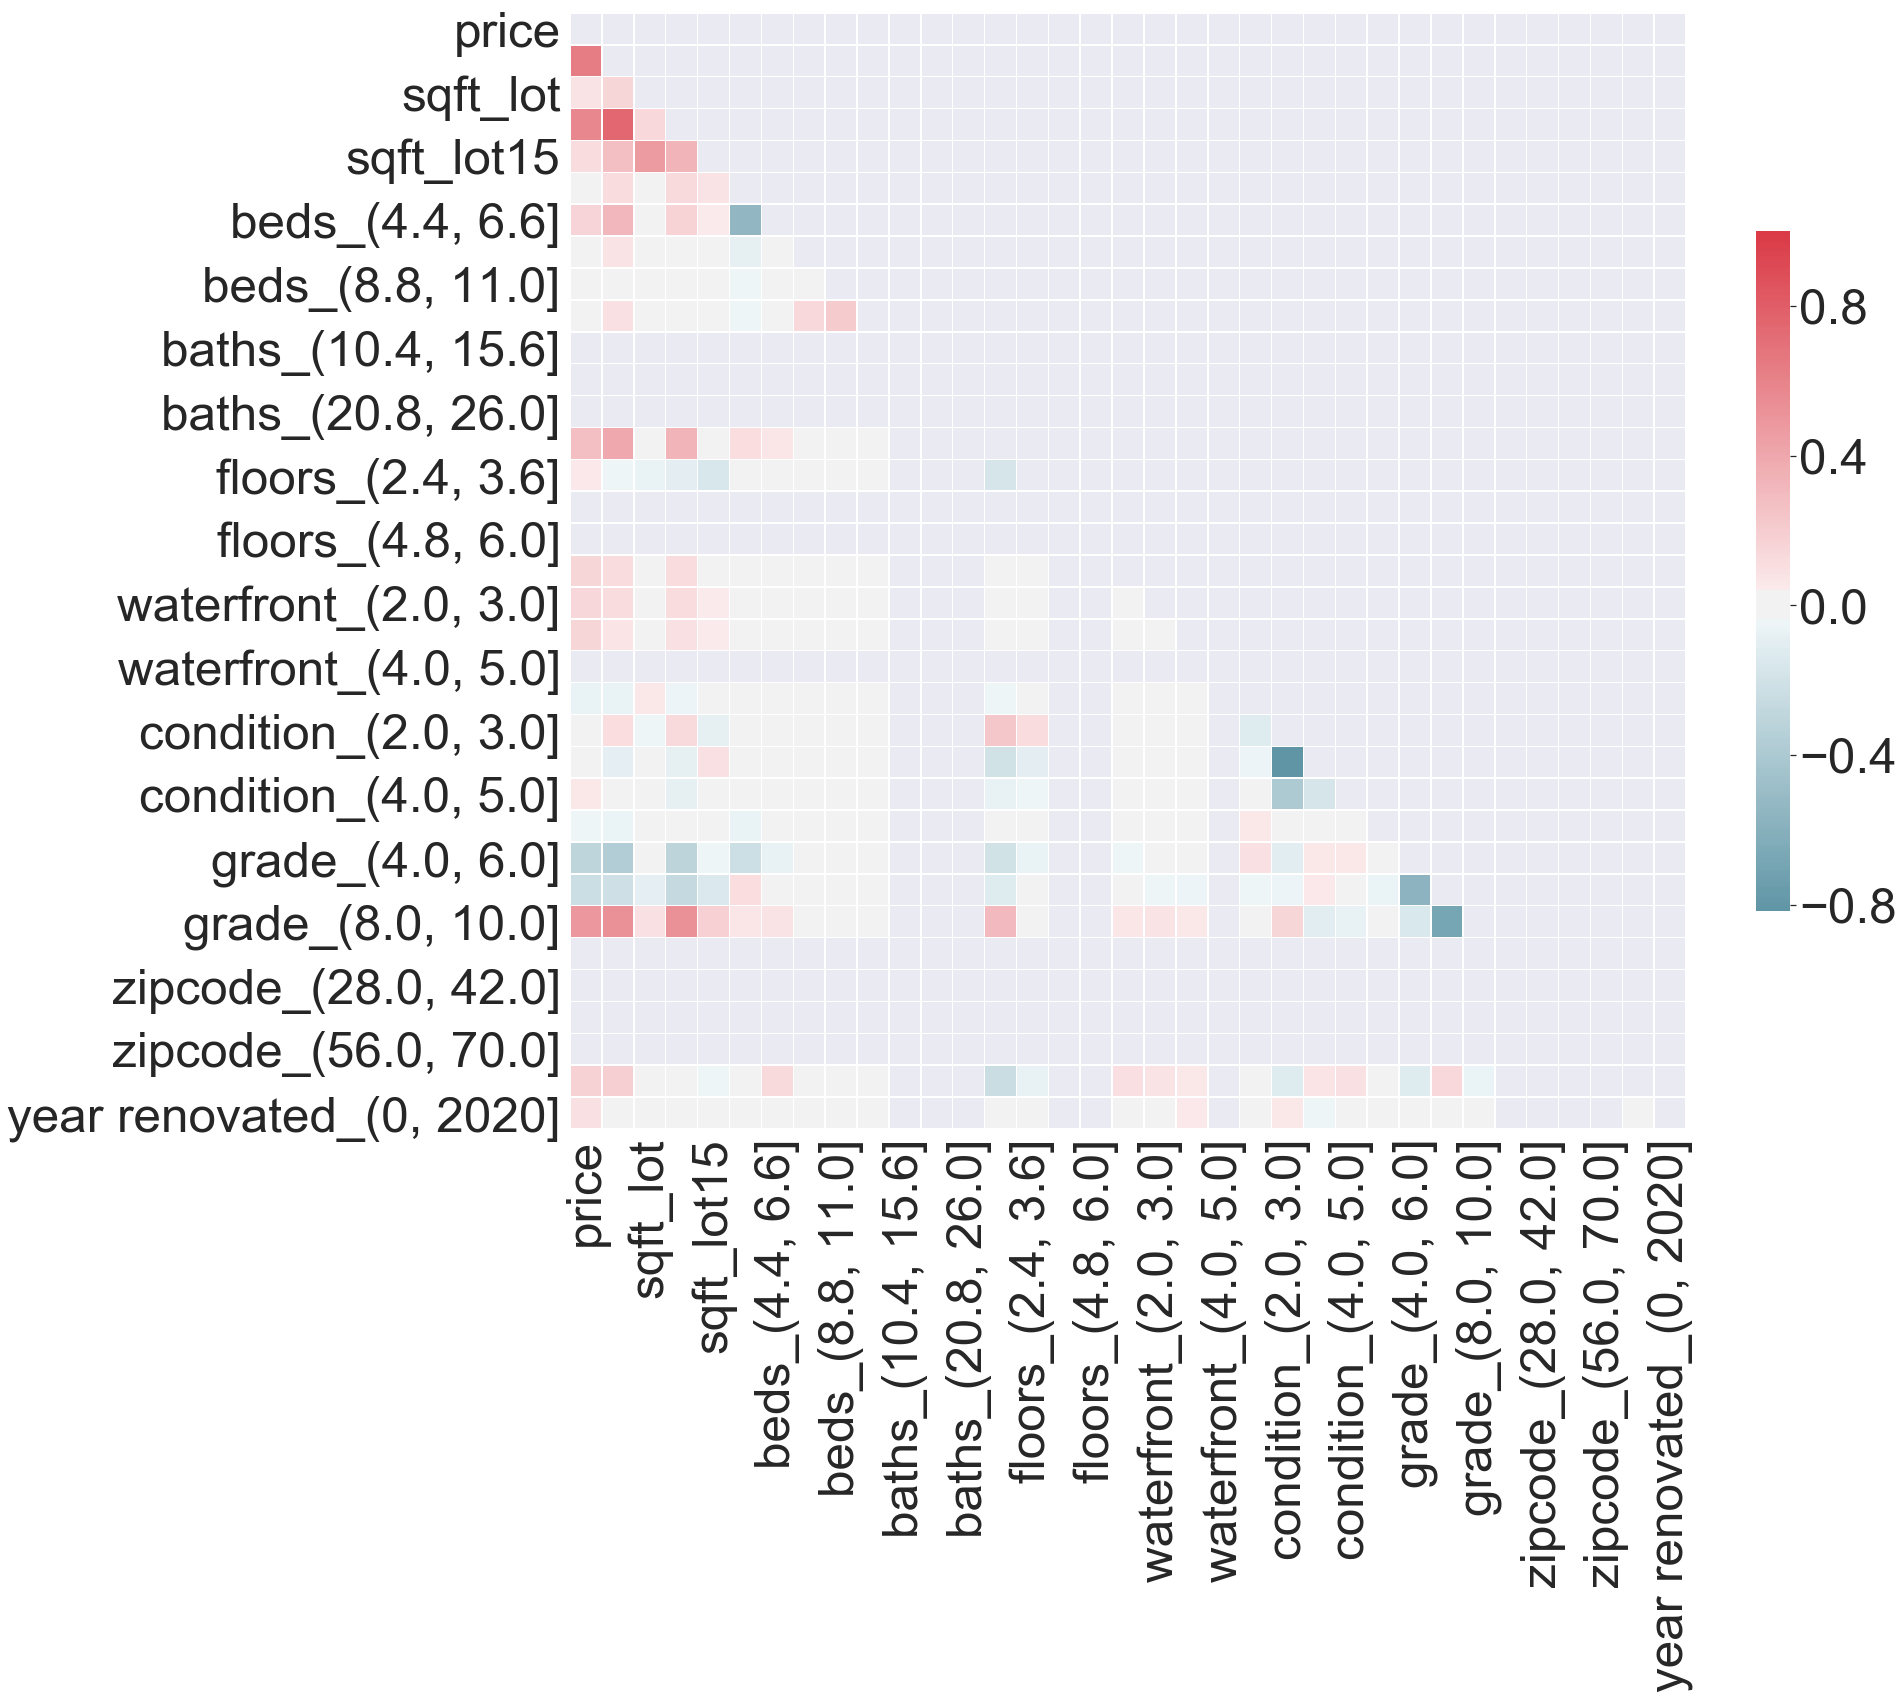

In [89]:
corr = final.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(25,25))

cmap = sns.diverging_palette(220, 10, as_cmap=True)


sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

#

This is cool, however, I think it's helpful to see the entire dataset together because there are a few large patterns going on here.  look at the swath of red in the high grade area as an example.  The few outstanding strongly negative correlations that pop out here and there around condtiion and square feet of the lots in the neighborhood.

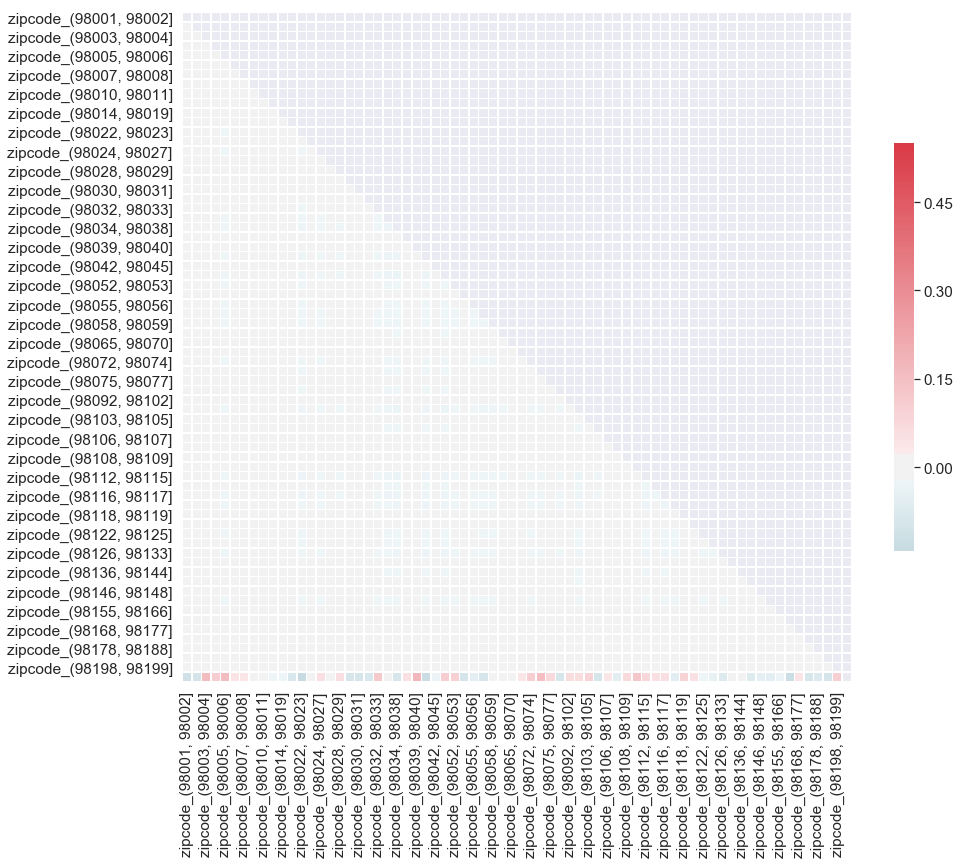

In [121]:
zipcode_corr = final.filter(regex='zipcode+', axis=1)
zipcode_corr = pd.concat([zipcode_corr, y], axis=1)

corr = zipcode_corr.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(15,15))
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.55, center=0, square=True, linewidths=.5, cbar_kws={"shrink":.5})
#vmax = max correlation up to one
#group by zipcode and take each zipcode avg price to make bar plot or scatter plot.


In [122]:
cleaned.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

C:\Users\Mark\AppData\Local\Continuum\anaconda3\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


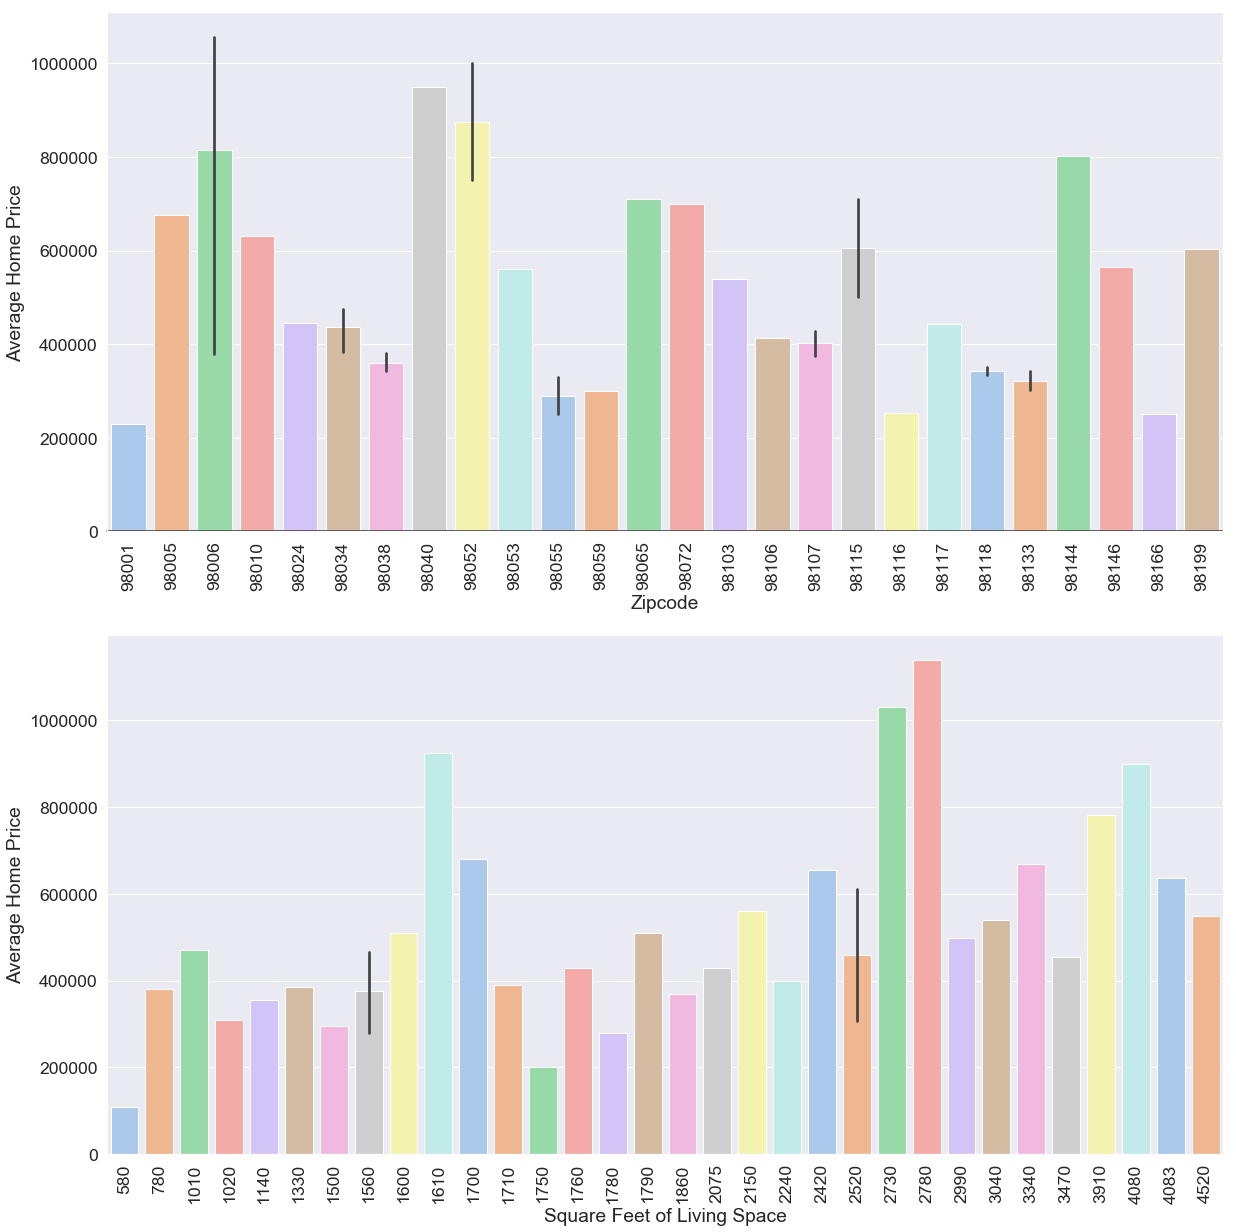

In [123]:
#zipcode bars
zipcode_bars = cleaned.drop(['date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'], axis=1)
sns.set(font_scale=1.6)

grouped_zipcode = zipcode_bars.groupby('zipcode').price.mean()

y1 = zipcode_bars.price.sort_values()



zip_sample = zipcode_bars.zipcode.sample(n=40)

f, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 21))

zipcodes = sns.barplot(x=zip_sample, y=y1, palette="pastel", ax=ax1)
ax1.axhline(0, color="k", clip_on=False)
ax1.set_ylabel("Average Home Price")
ax1.set_xlabel("Zipcode")
for i in zipcodes.get_xticklabels():
    i.set_rotation(90)
                                  
sq_sample = cleaned.sqft_living.sample(n=35)
                                  
square_feet = sns.barplot(x=sq_sample, y=cleaned.price, palette="pastel", ax=ax2)
ax2.set_ylabel("Average Home Price")
ax2.set_xlabel("Square Feet of Living Space")
for i in square_feet.get_xticklabels():
    i.set_rotation(90)
###


In [124]:


for k,v in enumerate(geo_data):
    print(v)

print(geo_data.lat.max(), geo_data.lat.min(), geo_data.long.max(), geo_data.long.min())

lat
long
zipcode
47.7776 47.1559 -121.315 -122.51899999999999


C:\Users\Mark\AppData\Local\Continuum\anaconda3\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


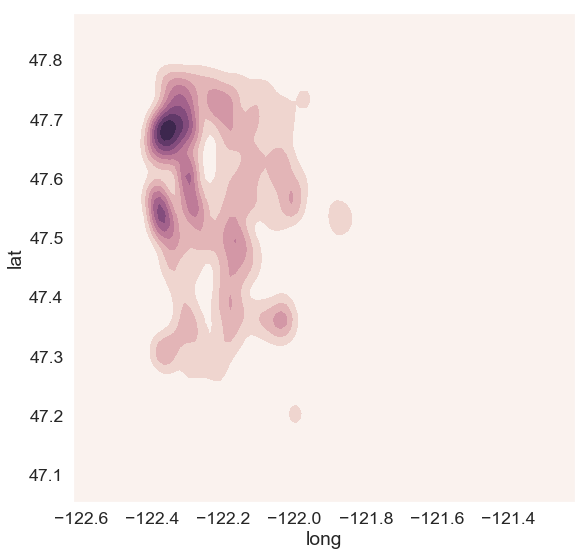

In [125]:

f, ax = plt.subplots(1,1, figsize=(9,9))

cmap = sns.cubehelix_palette(light=1, as_cmap=True)

sns.kdeplot(geo_data.long, geo_data.lat, cmap=cmap, shade=True, cut=5, ax=ax)




In [126]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats

import statsmodels.stats.api as sms

In [127]:
X.columns

Index(['sqft_living', 'sqft_lot', 'sqft_living15', 'beds_(1, 2]',
       'beds_(2, 3]', 'beds_(3, 4]', 'beds_(4, 5]', 'beds_(5, 6]',
       'beds_(6, 7]', 'beds_(7, 8]',
       ...
       'year built_(1990, 2000]', 'year built_(2000, 2010]',
       'year built_(2010, 2016]', 'year built_(2016, 2019]',
       'year renovated_(0, 2020]', 'sqft basement_(1, 440]',
       'sqft basement_(440, 880]', 'sqft basement_(880, 1760]',
       'sqft basement_(1760, 2200]', 'sqft basement_(2200, 4840]'],
      dtype='object', length=147)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


King County - Regression Analysis and Diagnostics for formula: Price~sqft_living
-------------------------------------------------------------------------------------


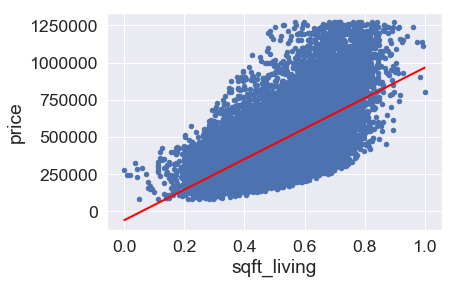

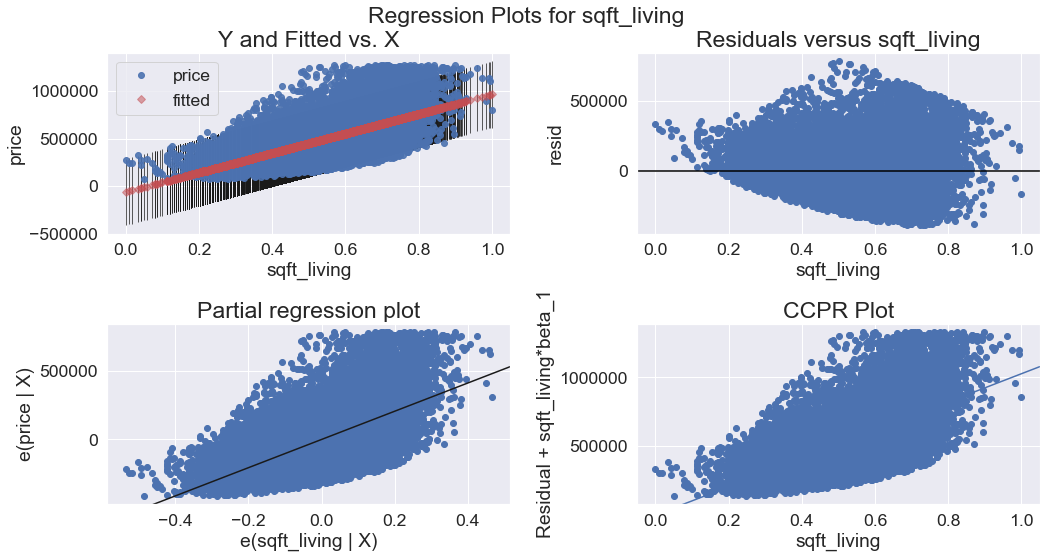

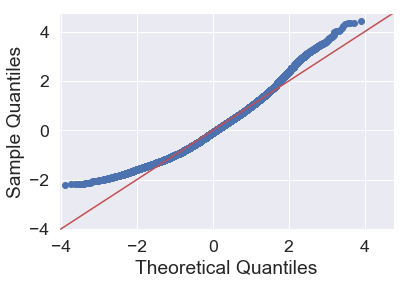

Press Enter to continue...


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


King County - Regression Analysis and Diagnostics for formula: Price~sqft_lot
-------------------------------------------------------------------------------------


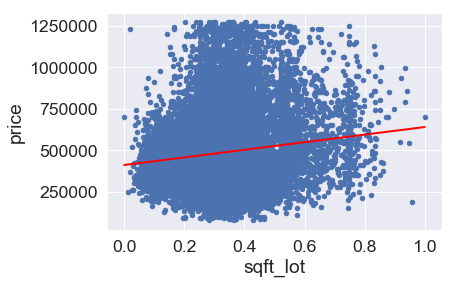

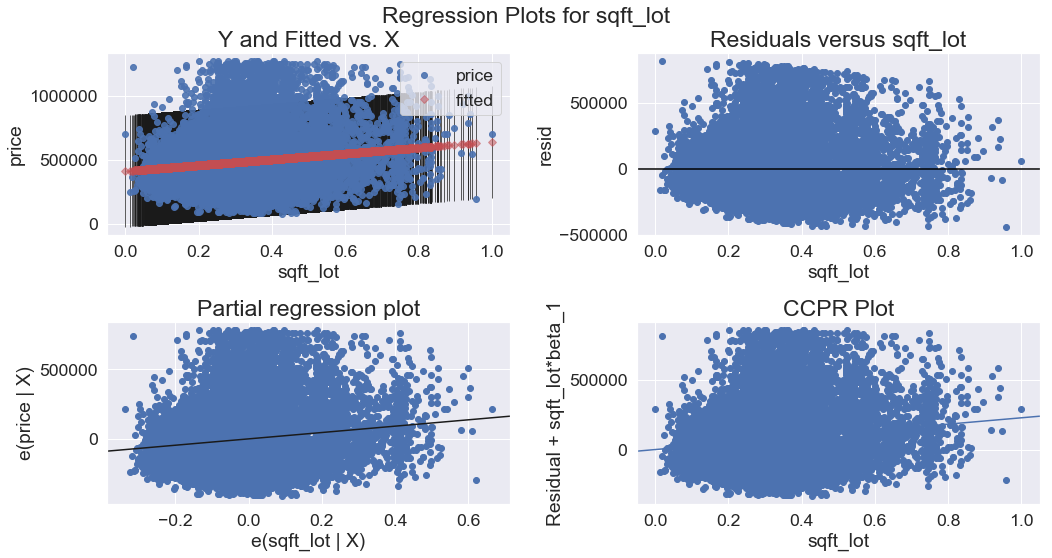

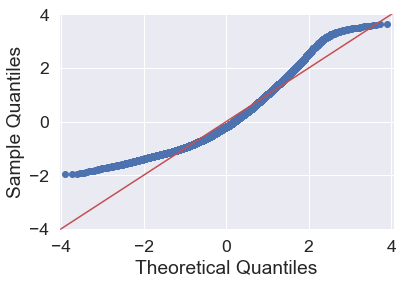

Press Enter to continue...


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


King County - Regression Analysis and Diagnostics for formula: Price~sqft_living15
-------------------------------------------------------------------------------------


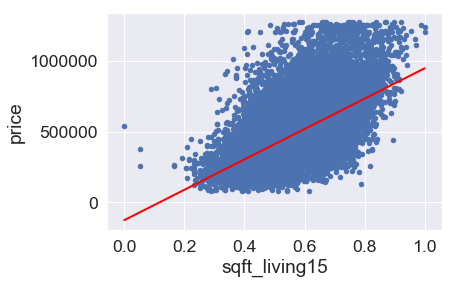

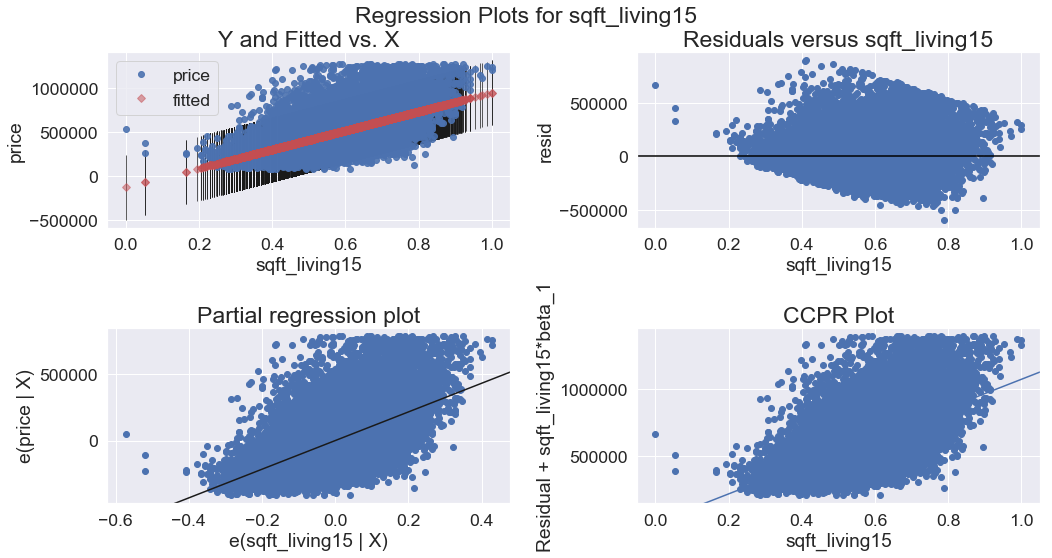

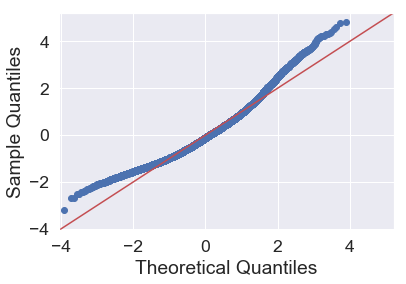

Press Enter to continue...
King County - Regression Analysis and Diagnostics for formula: Price~beds_(1, 2]
-------------------------------------------------------------------------------------


SyntaxError: invalid syntax (<unknown>, line 1)

In [128]:
results = [['variable', 'r_squared', 'intercept', 'slope', 'p-value', 'normality (JB)' ]]

for idx, val in enumerate(X):
    print ("King County - Regression Analysis and Diagnostics for formula: Price~" + val)
    print ("-------------------------------------------------------------------------------------")

    f = 'price~' + val
#   
    model = smf.ols(formula=f, data=final).fit()
    
    X_new = pd.DataFrame({val: [final[val].min(), final[val].max()]});
    preds = model.predict(X_new)
    final.plot(kind='scatter', x=val, y='price');
    plt.plot(X_new, preds, c='red', linewidth=2);
    plt.show()
    fig = plt.figure(figsize=(15,8))
    fig = sm.graphics.plot_regress_exog(model, val, fig=fig)
    fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True,   )
    plt.show()
    
    results.append([val, model.rsquared, model.params[0], model.params[1], model.pvalues[1], sms.jarque_bera(model.resid)[0] ])
    input("Press Enter to continue...")

### error
  File "<unknown>", line 1<br>
    beds_(1, 2]<br>
              ^
SyntaxError: invalid syntax

In [129]:

for i in results:
    [ round(elem,5) if (elem == float) | (elem == int) else elem for elem in results ]
    print(i)

['variable', 'r_squared', 'intercept', 'slope', 'p-value', 'normality (JB)']
['sqft_living', 0.37433217947479425, -61581.119017208424, 1027210.0215655788, 0.0, 1687.33734152529]
['sqft_lot', 0.012850519827301121, 410676.13918309286, 228834.4052142794, 2.505553748549218e-60, 3157.8198559633547]
['sqft_living15', 0.3140140693347654, -125913.68317948897, 1072298.1407862764, 0.0, 2849.9494536024663]


At this point we can start to make some interpretations.  We can plainly see that all of these variables positively affect the price

Do RFE and find more manageable set of variables to work with.

In [130]:
y = y
X = X


'''preds = "+".join(X.columns)
formula = y + "~" + preds
model = smf(formula= y, data= X).fit()'''


preds_int = sm.add_constant(X)
model = sm.OLS(y, preds_int).fit()

In [131]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     754.2
Date:                Sun, 24 Feb 2019   Prob (F-statistic):               0.00
Time:                        13:30:45   Log-Likelihood:            -2.6602e+05
No. Observations:               20756   AIC:                         5.323e+05
Df Residuals:                   20609   BIC:                         5.335e+05
Df Model:                         146                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                      -1.615e+05   1.03e+05     -1.573      0.116   -3.63e+05    3.97e+04
sqft_living                 5.571e+05   1.19e+04     46.626      0.000    5.34e+05     5.8e+05
sqft_lot                    2.354e+05   9022.540     26.093      0.000    2.18e+05    2.53e+05
sqft_living15                1.33e+05   9303.583     14.295      0.000    1.15e+05    1.51e+05
beds_(1, 2]                -8110.1224   6941.674     -1.168      0.243   -2.17e+04    5496.107
beds_(2, 3]                -1.038e+04   7025.588     -1.477      0.140   -2.41e+04    3392.497
beds_(3, 4]                -1.155e+04   7228.304     -1.598      0.110   -2.57e+04    2620.182
beds_(4, 5]                -2.128e+04   7655.984     -2.780      0.005   -3.63e+04   -6274.897
beds_(5, 6]                -2.683e+04   9484.573     -2.829      0.005   -4.54e+04   -8244.204
beds_(6, 7]                 -6.96e+04   1.83e+04     -3.796      0.000   -1.06e+05   -3.37e+04
beds_(7, 8]                -7.566e+04   3.11e+04     -2.433      0.015   -1.37e+05   -1.47e+04
beds_(8, 9]                -4.765e+04   5.27e+04     -0.905      0.366   -1.51e+05    5.56e+04
beds_(9, 10]                -7.74e+04   5.47e+04     -1.415      0.157   -1.85e+05    2.98e+04
beds_(10, 11]              -8930.4261   9.01e+04     -0.099      0.921   -1.85e+05    1.68e+05
baths_(0.5, 0.75]           4.018e+04   4.62e+04      0.870      0.384   -5.04e+04    1.31e+05
baths_(0.75, 1.0]           3.038e+04   4.49e+04      0.677      0.498   -5.75e+04    1.18e+05
baths_(1.0, 1.25]          -2668.0770   5.49e+04     -0.049      0.961    -1.1e+05    1.05e+05
baths_(1.25, 1.5]           2.573e+04   4.49e+04      0.573      0.567   -6.23e+04    1.14e+05
baths_(1.5, 1.75]           2.369e+04   4.49e+04      0.528      0.598   -6.43e+04    1.12e+05
baths_(1.75, 2.0]           2.273e+04   4.49e+04      0.506      0.613   -6.53e+04    1.11e+05
baths_(2.0, 2.25]           3.588e+04   4.49e+04      0.799      0.425   -5.22e+04    1.24e+05
baths_(2.25, 2.5]           3.298e+04   4.49e+04      0.734      0.463   -5.51e+04    1.21e+05
baths_(2.5, 2.75]           4.982e+04    4.5e+04      1.108      0.268   -3.83e+04    1.38e+05
baths_(2.75, 3.0]           5.426e+04    4.5e+04      1.205      0.228    -3.4e+04    1.43e+05
baths_(3.0, 3.25]           7.612e+04   4.51e+04      1.687      0.092   -1.23e+04    1.65e+05
baths_(3.25, 3.5]           7.356e+04   4.51e+04      1.631      0.103   -1.48e+04    1.62e+05
baths_(3.5, 3.75]           1.231e+05   4.58e+04      2.686      0.007    3.33e+04    2.13e+05
baths_(3.75, 4.0]            8.03e+04   4.61e+04      1.744      0.081   -9960.954    1.71e+05
baths_(4.0, 4.25]           1.166e+05   4.74e+04      2.462      0.014    2.38e+04    2.09e+05
baths_(4.25, 4.5]           5.876e+04   4.6

In [132]:
from sklearn.linear_model import LinearRegression
y = y
linreg = LinearRegression()
linreg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [133]:
#


data = zip(*linreg.coef_)
coef = zip(final.columns, data)


print(f' intercpet: {list(linreg.intercept_)}')
list(coef)

 intercpet: [-161453.15773759742]


[('price', (557057.5911424098,)),
 ('sqft_living', (235427.84474893636,)),
 ('sqft_lot', (132995.71858887016,)),
 ('sqft_living15', (-8110.122442261374,)),
 ('beds_(1, 2]', (-10378.211059919122,)),
 ('beds_(2, 3]', (-11547.865056680763,)),
 ('beds_(3, 4]', (-21281.23000418709,)),
 ('beds_(4, 5]', (-26834.716795957116,)),
 ('beds_(5, 6]', (-69597.79280141884,)),
 ('beds_(6, 7]', (-75656.7383912397,)),
 ('beds_(7, 8]', (-47650.02275003673,)),
 ('beds_(8, 9]', (-77403.91341057084,)),
 ('beds_(9, 10]', (-8930.426082218375,)),
 ('beds_(10, 11]', (40178.29266639163,)),
 ('baths_(0.5, 0.75]', (30381.843441986304,)),
 ('baths_(0.75, 1.0]', (-2668.076950274599,)),
 ('baths_(1.0, 1.25]', (25728.067488341898,)),
 ('baths_(1.25, 1.5]', (23688.684732013142,)),
 ('baths_(1.5, 1.75]', (22725.085220849323,)),
 ('baths_(1.75, 2.0]', (35880.447149947955,)),
 ('baths_(2.0, 2.25]', (32975.52231695441,)),
 ('baths_(2.25, 2.5]', (49823.50283509715,)),
 ('baths_(2.5, 2.75]', (54262.400360945525,)),
 ('baths_

In [134]:
y.shape


(20756, 1)

In [135]:
from sklearn.feature_selection import RFE

linreg = LinearRegression()
selector = RFE(linreg, n_features_to_select = 10)
selector = selector.fit(X, y)

C:\Users\Mark\AppData\Local\Continuum\anaconda3\envs\learn-env\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [136]:
len(selector.support_)

147

In [137]:
top_ten = X.columns[selector.support_ == True]
list(top_ten)

['sqft_living',
 'sqft_living15',
 'baths_(5.75, 6.0]',
 'grade_(11, 12]',
 'zipcode_(98003, 98004]',
 'zipcode_(98038, 98039]',
 'zipcode_(98039, 98040]',
 'zipcode_(98108, 98109]',
 'zipcode_(98109, 98112]',
 'zipcode_(98118, 98119]']

Above we have the top ten most impactful variables as ranked by sklearn's RFE which uses the ressiduals of these variables.  This, to me, is useful because it narrows down the search.  We've learned that high grade properties are valueable, lots of bathrooms are valueable, certaain zipcodes as we previously hypothesized are valueable and the living space is the most valuable of all the continuous data.

This isn't bad for a first pass.  I'd like to take a close look at this data by narrowing down this search.  I'd also like to rephrase a few of my categories.  There is a chance the variable which is selecting 6 bathrooms is only catching outlier-ish data.  I'd like to reset the bins of some of the categories to quantiles and call them ['poor' 'fair' ' average' 'good' 'great'] when apilcable

In [138]:

def stepwise_selection(X, y, initial_list=[], threshold_in=0.01, threshold_out = 0.05, verbose=True):

    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [140]:
#stepwise_selection(X, y)
returns = ['grade_(5, 6]',
 'sqft_living',
 'grade_(6, 7]',
 'grade_(7, 8]',
 'zipcode_(98003, 98004]',
 'year built_(1920, 1930]',
 'zipcode_(98022, 98023]',
 'grade_(4, 5]',
 'zipcode_(98039, 98040]',
 'zipcode_(98077, 98092]',
 'zipcode_(98109, 98112]',
 'zipcode_(98112, 98115]',
 'grade_(8, 9]',
 'zipcode_(98102, 98103]',
 'zipcode_(98198, 98199]',
 'zipcode_(98032, 98033]',
 'zipcode_(98116, 98117]',
 'waterfront_(3.0, 4.0]',
 'zipcode_(98103, 98105]',
 'zipcode_(98118, 98119]',
 'sqft_living15',
 'zipcode_(98106, 98107]',
 'zipcode_(98115, 98116]',
 'zipcode_(98119, 98122]',
 'zipcode_(98108, 98109]',
 'condition_(2, 3]',
 'zipcode_(98092, 98102]',
 'zipcode_(98005, 98006]',
 'zipcode_(98004, 98005]',
 'zipcode_(98045, 98052]',
 'zipcode_(98133, 98136]',
 'zipcode_(98136, 98144]',
 'zipcode_(98052, 98053]',
 'sqft_lot',
 'zipcode_(98007, 98008]',
 'zipcode_(98038, 98039]',
 'zipcode_(98125, 98126]',
 'zipcode_(98122, 98125]',
 'zipcode_(98019, 98022]',
 'zipcode_(98028, 98029]',
 'waterfront_(2.0, 3.0]',
 'zipcode_(98074, 98075]',
 'zipcode_(98168, 98177]',
 'zipcode_(98033, 98034]',
 'zipcode_(98072, 98074]',
 'zipcode_(98006, 98007]',
 'zipcode_(98117, 98118]',
 'grade_(10, 11]',
 'zipcode_(98024, 98027]',
 'zipcode_(98126, 98133]',
 'waterfront_(1.0, 2.0]',
 'condition_(4, 5]',
 'year renovated_(0, 2020]',
 'year built_(2010, 2016]',
 'zipcode_(98070, 98072]',
 'zipcode_(98148, 98155]',
 'waterfront_(0.0, 1.0]',
 'zipcode_(98075, 98077]',
 'grade_(3, 4]',
 'year built_(1970, 1980]',
 'condition_(3, 4]',
 'baths_(3.5, 3.75]',
 'floors_(2.5, 3.0]',
 'baths_(3.0, 3.25]',
 'baths_(3.25, 3.5]',
 'zipcode_(98010, 98011]',
 'year built_(1960, 1970]',
 'zipcode_(98027, 98028]',
 'zipcode_(98059, 98065]',
 'zipcode_(98105, 98106]',
 'year built_(1980, 1990]',
 'year built_(1950, 1960]',
 'zipcode_(98058, 98059]',
 'zipcode_(98107, 98108]',
 'zipcode_(98144, 98146]',
 'zipcode_(98055, 98056]',
 'zipcode_(98155, 98166]',
 'zipcode_(98023, 98024]',
 'zipcode_(98042, 98045]',
 'zipcode_(98014, 98019]',
 'zipcode_(98065, 98070]',
 'zipcode_(98011, 98014]',
 'sqft basement_(880, 1760]',
 'sqft basement_(440, 880]',
 'baths_(2.5, 2.75]',
 'baths_(2.75, 3.0]',
 'baths_(4.0, 4.25]',
 'year built_(1990, 2000]',
 'baths_(5.75, 6.0]',
 'condition_(1, 2]',
 'grade_(11, 12]',
 'sqft basement_(1, 440]',
 'baths_(3.75, 4.0]',
 'zipcode_(98177, 98178]',
 'beds_(6, 7]',
 'year built_(1910, 1920]',
 'zipcode_(98146, 98148]',
 'zipcode_(98008, 98010]',
 'baths_(1.75, 2.0]',
 'baths_(1.5, 1.75]',
 'beds_(4, 5]',
 'floors_(1.5, 2.0]',
 'zipcode_(98053, 98055]',
 'zipcode_(98056, 98058]',
 'zipcode_(98034, 98038]',
 'zipcode_(98166, 98168]',
 'zipcode_(98188, 98198]',
 'zipcode_(98178, 98188]']

In [141]:
stepwise_X = X[returns]


In [142]:
dropped = X.drop(returns, axis=1)
dropped.columns

Index(['beds_(1, 2]', 'beds_(2, 3]', 'beds_(3, 4]', 'beds_(5, 6]',
       'beds_(7, 8]', 'beds_(8, 9]', 'beds_(9, 10]', 'beds_(10, 11]',
       'baths_(0.5, 0.75]', 'baths_(0.75, 1.0]', 'baths_(1.0, 1.25]',
       'baths_(1.25, 1.5]', 'baths_(2.0, 2.25]', 'baths_(2.25, 2.5]',
       'baths_(4.25, 4.5]', 'baths_(4.5, 4.75]', 'baths_(4.75, 5.0]',
       'baths_(5.0, 5.25]', 'baths_(5.25, 5.5]', 'baths_(5.5, 5.75]',
       'baths_(6.0, 6.5]', 'baths_(6.5, 6.75]', 'baths_(6.75, 7.5]',
       'floors_(1.0, 1.5]', 'floors_(2.0, 2.5]', 'floors_(3.0, 3.5]',
       'grade_(9, 10]', 'zipcode_(98001, 98002]', 'zipcode_(98002, 98003]',
       'zipcode_(98029, 98030]', 'zipcode_(98030, 98031]',
       'zipcode_(98031, 98032]', 'zipcode_(98040, 98042]',
       'year built_(1930, 1940]', 'year built_(1940, 1950]',
       'year built_(2000, 2010]', 'year built_(2016, 2019]',
       'sqft basement_(1760, 2200]', 'sqft basement_(2200, 4840]'],
      dtype='object')

In [143]:
y = y
X = stepwise_X


X.shape

(20756, 108)

In [144]:
preds_int = sm.add_constant(X)
model = sm.OLS(y, preds_int).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     1017.
Date:                Sun, 24 Feb 2019   Prob (F-statistic):               0.00
Time:                        14:05:35   Log-Likelihood:            -2.6606e+05
No. Observations:               20756   AIC:                         5.323e+05
Df Residuals:                   20647   BIC:                         5.332e+05
Df Model:                         108                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                     -8.926e+04   1.92e+04     -4.647      0.000   -1.27e+05   -5.16e+04
grade_(5, 6]              -2.145e+05   4938.616    -43.431      0.000   -2.24e+05   -2.05e+05
sqft_living                5.464e+05   9740.684     56.094      0.000    5.27e+05    5.65e+05
grade_(6, 7]              -1.973e+05   4064.195    -48.534      0.000   -2.05e+05   -1.89e+05
grade_(7, 8]              -1.558e+05   3704.537    -42.055      0.000   -1.63e+05   -1.49e+05
zipcode_(98003, 98004]     5.379e+05   7167.282     75.044      0.000    5.24e+05    5.52e+05
year built_(1920, 1930]    1.964e+04   3091.630      6.352      0.000    1.36e+04    2.57e+04
zipcode_(98022, 98023]    -1.869e+04   4514.962     -4.139      0.000   -2.75e+04   -9838.927
grade_(4, 5]              -2.083e+05   7634.916    -27.280      0.000   -2.23e+05   -1.93e+05
zipcode_(98039, 98040]     4.391e+05   6920.760     63.445      0.000    4.26e+05    4.53e+05
zipcode_(98077, 98092]    -2.945e+04   5213.651     -5.649      0.000   -3.97e+04   -1.92e+04
zipcode_(98109, 98112]     4.723e+05   6967.308     67.792      0.000    4.59e+05    4.86e+05
zipcode_(98112, 98115]     3.327e+05   4490.884     74.080      0.000    3.24e+05    3.41e+05
grade_(8, 9]              -7.475e+04   3692.152    -20.247      0.000    -8.2e+04   -6.75e+04
zipcode_(98102, 98103]      3.41e+05   4627.307     73.686      0.000    3.32e+05     3.5e+05
zipcode_(98198, 98199]     3.717e+05   5908.684     62.906      0.000     3.6e+05    3.83e+05
zipcode_(98032, 98033]     3.275e+05   5014.075     65.319      0.000    3.18e+05    3.37e+05
zipcode_(98116, 98117]     3.245e+05   4596.109     70.595      0.000    3.15e+05    3.33e+05
waterfront_(3.0, 4.0]      2.328e+05   6969.144     33.403      0.000    2.19e+05    2.46e+05
zipcode_(98103, 98105]     4.041e+05   7019.134     57.568      0.000     3.9e+05    4.18e+05
zipcode_(98118, 98119]     4.308e+05   7560.870     56.977      0.000    4.16e+05    4.46e+05
sqft_living15              1.382e+05   9204.697     15.014      0.000     1.2e+05    1.56e+05
zipcode_(98106, 98107]     3.418e+05   6152.998     55.549      0.000     3.3e+05    3.54e+05
zipcode_(98115, 98116]     3.016e+05   5625.318     53.611      0.000    2.91e+05    3.13e+05
zipcode_(98119, 98122]     3.335e+05   5958.199     55.969      0.000    3.22e+05    3.45e+05
zipcode_(98108, 98109]     4.404e+05   9744.939     45.193      0.000    4.21e+05     4.6e+05
condition_(2, 3]           1.105e+05   1.72e+04      6.443      0.000    7.69e+04    1.44e+05
zipcode_(98092, 98102]     4.404e+05   9754.363     45.149      0.000    4.21e+05     4.6e+05
zipcode_(98005, 98006]     2.802e+05   4886.699     57.346      0.000    2.71e+05     2.9e+05
zipcode_(98004, 98005]     3.348e+05   7480.546     44.760      0.000     3


Make a train_test_split and run a few visualizations again.

In [145]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.2)
linreg = LinearRegression()

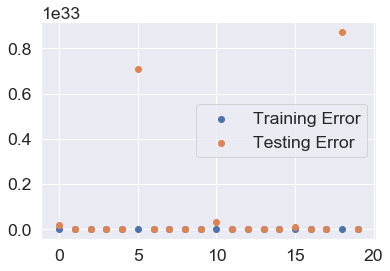

In [146]:

num = 20
train_err = []
test_err = []
for i in range(num):
    Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.25)
    linreg.fit(Xtrain, ytrain)
    y_hat_train = linreg.predict(Xtrain)
    y_hat_test = linreg.predict(Xtest)
    train_err.append(mean_squared_error(ytrain, y_hat_train))
    test_err.append(mean_squared_error(ytest, y_hat_test))
plt.scatter(list(range(num)), train_err, label='Training Error')
plt.scatter(list(range(num)), test_err, label='Testing Error')
plt.legend();

In [147]:
list(zip(train_err, test_err))


[(7975049259.080319, 2.054831906315897e+31),
 (8006990275.07506, 7952462305.663124),
 (7986270281.021213, 8000850958.929987),
 (7941635209.000195, 8150468523.6304865),
 (7956887841.586123, 8095381861.251902),
 (8075849066.064746, 7.077798080221096e+32),
 (7921851707.279326, 8212206105.936326),
 (7938513339.069791, 8147225737.867539),
 (7905935781.515849, 8261158419.303912),
 (8017182661.066017, 7921005477.212215),
 (7898899614.518515, 3.1549320138427143e+31),
 (7923371795.634978, 8196425761.454878),
 (7974735136.969802, 8057151534.81724),
 (8028429462.976909, 7887099003.584931),
 (8025767741.83133, 7903612270.950268),
 (7896642185.364136, 1.1270457172905941e+31),
 (7837625639.542181, 8493403153.561876),
 (7938926869.124248, 8165084040.442263),
 (7966503831.271981, 8.729162955599238e+32),
 (7925952490.324639, 8195075711.754705)]

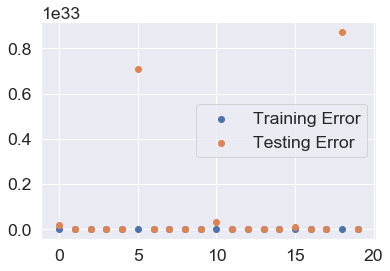

In [148]:

num = 20
res_train_err = []
res_test_err = []
for i in range(num):
    Xtrain, Xtest, ytrain, ytest = train_test_split(stepwise_X, y, test_size = 0.25)
    linreg.fit(Xtrain, ytrain)
    y_hat_train = linreg.predict(Xtrain)
    y_hat_test = linreg.predict(Xtest)
    res_train_err.append(mean_squared_error(ytrain, y_hat_train))
    res_test_err.append(mean_squared_error(ytest, y_hat_test))
plt.scatter(list(range(num)), train_err, label='Training Error')
plt.scatter(list(range(num)), test_err, label='Testing Error')
plt.legend();

C:\Users\Mark\AppData\Local\Continuum\anaconda3\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


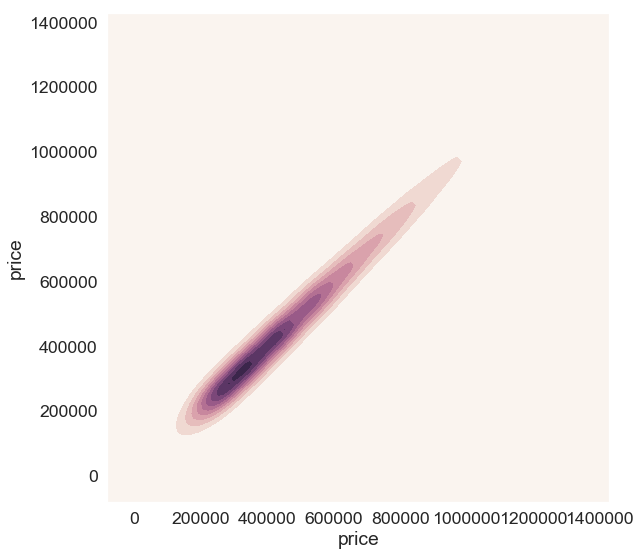

In [149]:
f, ax = plt.subplots(1,1, figsize=(9,9))

cmap = sns.cubehelix_palette(light=1, as_cmap=True)

sns.kdeplot(cleaned_price, cleaned_price, cmap=cmap, shade=True, cut=5, ax=ax)


C:\Users\Mark\AppData\Local\Continuum\anaconda3\envs\learn-env\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


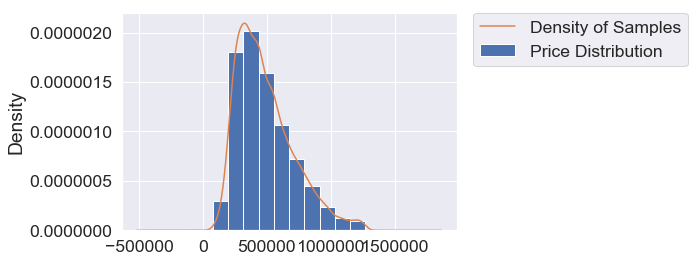

In [150]:

cleaned_price.hist(normed=True, label='Price Distribution')
cleaned_price.plot.kde(label='Density of Samples')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [ ]:
cleaned_price[cleaned_price < 1000000].hist(normed=True, label='Price Distribution')
cleaned_price[cleaned_price < 1000000].plot.kde(label='Density of Samples')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


We can see that still some variance in our MSEs even after eliminating the variables we found to be unpredictable using the stepwise function.  Our price distribution is still skewed and so we have to choose if we want to eliminate more houses over $1,000,000 or live with the error in predictive value

As a final check, run a k-fold test and narrow down our most effective predictors.

In [151]:
from sklearn.model_selection import cross_val_score

cv_10_results = np.mean(cross_val_score(linreg, stepwise_X, y, cv=10, scoring="neg_mean_squared_error"))
cv_20_results = np.mean(cross_val_score(linreg, stepwise_X, y, cv=20, scoring="neg_mean_squared_error"))

In [152]:
cv_10_results

-1.694582189785758e+32

In [153]:
cv_20_results

-1.313274034793485e+32

In [154]:
###MSE is the squared price error 
from math import sqrt
pos_MSE = -1*cv_20_results
Median_Error = sqrt(pos_MSE)
print(f'Average error of prediction model: ${round(Median_Error, 2)}')

Average error of prediction model: $1.1459816904268082e+16


Most predictions are pretty good, however a few throw unreal errors because of a few very small categories.

Further refinement is needed

Let's redefine those categories and see if we can't get some of the variables we dropped to be more useful.

We will:<br>
reduce view, waterfront, condition, grade to quantiles<br>
reduce basement to bool<br>
drop yr_built<br>
round baths<br>

In [67]:
categories.head()

,yr_built,yr_renovated,zipcode,bedrooms,bathrooms,floors,sqft_basement,waterfront,condition,grade
0,1955,0.0,98178,3,1.00,1.0,0.0,0.0,3,7
1,1951,1991.0,98125,3,2.25,2.0,400.0,0.0,3,7
2,1933,0.0,98028,2,1.00,1.0,0.0,0.0,3,6
3,1965,0.0,98136,4,3.00,1.0,910.0,0.0,5,7
4,1987,0.0,98074,3,2.00,1.0,0.0,0.0,3,8


In [80]:


for col in categories.columns:
    categories[col] = categories[col].astype('category')

categories.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20113 entries, 0 to 21596
Data columns (total 10 columns):
yr_built         20113 non-null category
yr_renovated     20113 non-null category
zipcode          20113 non-null category
bedrooms         20113 non-null category
bathrooms        20113 non-null category
floors           20113 non-null category
sqft_basement    20113 non-null category
waterfront       20113 non-null category
condition        20113 non-null category
grade            20113 non-null category
dtypes: category(10)
memory usage: 400.1 KB


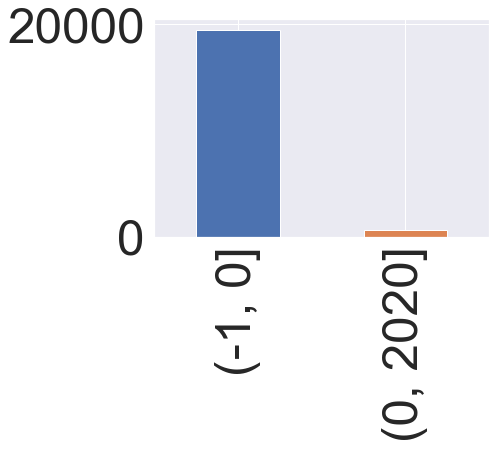

In [81]:
renovated_bins = [-1,0,2020]
renovated = pd.cut(categories['yr_renovated'], renovated_bins)
renovated = renovated.cat.as_unordered()
renovated.value_counts().plot(kind='bar')
#Still pretty overwhelming, but lets go with it, maybe renovation will have affect on the price.

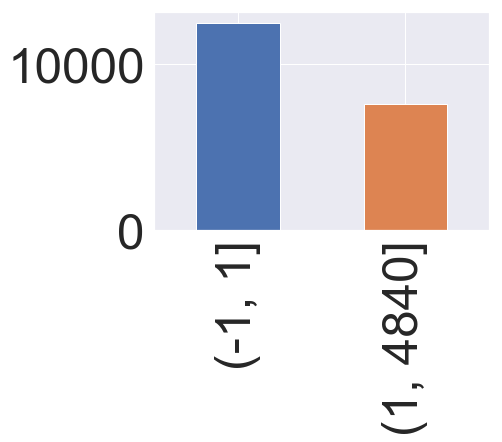

In [82]:
basement_bins = [-1,1,4840]
basement = pd.cut(categories['sqft_basement'], basement_bins)
basement = basement.cat.as_unordered()
basement.value_counts().plot(kind='bar')


In [83]:
spread_categories = pd.DataFrame().reindex_like(categories)

def quantile_bining(series):
    bins = list(series.unique())
    ln = len(bins)
    bins = [0, (ln/5), (2*ln/5), 3*ln/5, 4*ln/5, ln ] 
    bins.sort()
    return bins
'''
def make_dummies(pred):
    category = pd.cut(categories[str(pred)], quantile_bining(categories[str(pred)]))
    category = category.cat.as_unordered()
    dummied = pd.get_dummies(category, prefix=series, drop_first=True)
    #concated = pd.concat(spread_categories, category, axis=1)
    return dummied 
    '''




'\ndef make_dummies(pred):\n    category = pd.cut(categories[str(pred)], quantile_bining(categories[str(pred)]))\n    category = category.cat.as_unordered()\n    dummied = pd.get_dummies(category, prefix=series, drop_first=True)\n    #concated = pd.concat(spread_categories, category, axis=1)\n    return dummied \n    '

In [84]:
categories.columns

Index(['yr_built', 'yr_renovated', 'zipcode', 'bedrooms', 'bathrooms',
       'floors', 'sqft_basement', 'waterfront', 'condition', 'grade'],
      dtype='object')

In [85]:
beds = pd.cut(categories.bedrooms, quantile_bining(categories.bedrooms))
beds = beds.cat.as_unordered()
beds = pd.get_dummies(beds, prefix='beds', drop_first=True)

baths = pd.cut(categories.bathrooms, quantile_bining(categories.bathrooms))
baths = baths.cat.as_unordered()
baths = pd.get_dummies(baths, prefix='baths', drop_first=True)

floors = pd.cut(categories.floors, quantile_bining(categories.floors))
floors = floors.cat.as_unordered()
floors = pd.get_dummies(floors, prefix='floors', drop_first=True)

waterfront = pd.cut(categories.waterfront, quantile_bining(categories.waterfront))
waterfront = waterfront.cat.as_unordered()
waterfront = pd.get_dummies(waterfront, prefix='waterfront', drop_first=True)

condition = pd.cut(categories.condition, quantile_bining(categories.condition))
condition = condition.cat.as_unordered()
condition = pd.get_dummies(condition, prefix='condition', drop_first=True)

grade = pd.cut(categories.grade, quantile_bining(categories.grade))
grade = grade.cat.as_unordered()
grade = pd.get_dummies(grade, prefix='grade', drop_first=True)

renovated = pd.get_dummies(renovated, prefix='year renovated', drop_first=True)

basement = pd.get_dummies(basement, prefix='sqft basement', drop_first=True)


In [86]:
#carry non ordinal categories since we do not want to change this category

categories_spread = pd.concat([beds, baths, floors, waterfront, condition, grade, zipcode, basement, renovated], axis=1)
len(categories_spread.columns)
categories_spread.columns

Index(['beds_(2.2, 4.4]', 'beds_(4.4, 6.6]', 'beds_(6.6, 8.8]',
       'beds_(8.8, 11.0]', 'baths_(5.2, 10.4]', 'baths_(10.4, 15.6]',
       'baths_(15.6, 20.8]', 'baths_(20.8, 26.0]', 'floors_(1.2, 2.4]',
       'floors_(2.4, 3.6]', 'floors_(3.6, 4.8]', 'floors_(4.8, 6.0]',
       'waterfront_(1.0, 2.0]', 'waterfront_(2.0, 3.0]',
       'waterfront_(3.0, 4.0]', 'waterfront_(4.0, 5.0]',
       'condition_(1.0, 2.0]', 'condition_(2.0, 3.0]', 'condition_(3.0, 4.0]',
       'condition_(4.0, 5.0]', 'grade_(2.0, 4.0]', 'grade_(4.0, 6.0]',
       'grade_(6.0, 8.0]', 'grade_(8.0, 10.0]', 'zipcode_(14.0, 28.0]',
       'zipcode_(28.0, 42.0]', 'zipcode_(42.0, 56.0]', 'zipcode_(56.0, 70.0]',
       'sqft basement_(1, 4840]', 'year renovated_(0, 2020]'],
      dtype='object')

In [91]:
final2 = pd.concat([scaled, categories_spread, cleaned_price], axis=1)

y = pd.DataFrame(final2.price)
X = final2.drop(['price'], axis=1)

'\nfor i in heatmap2.get_xticklabels():\n    i.set_rotation(45)\nfor i in heatmap2.get_yticklabels():\n    i.set_rotation(45)'

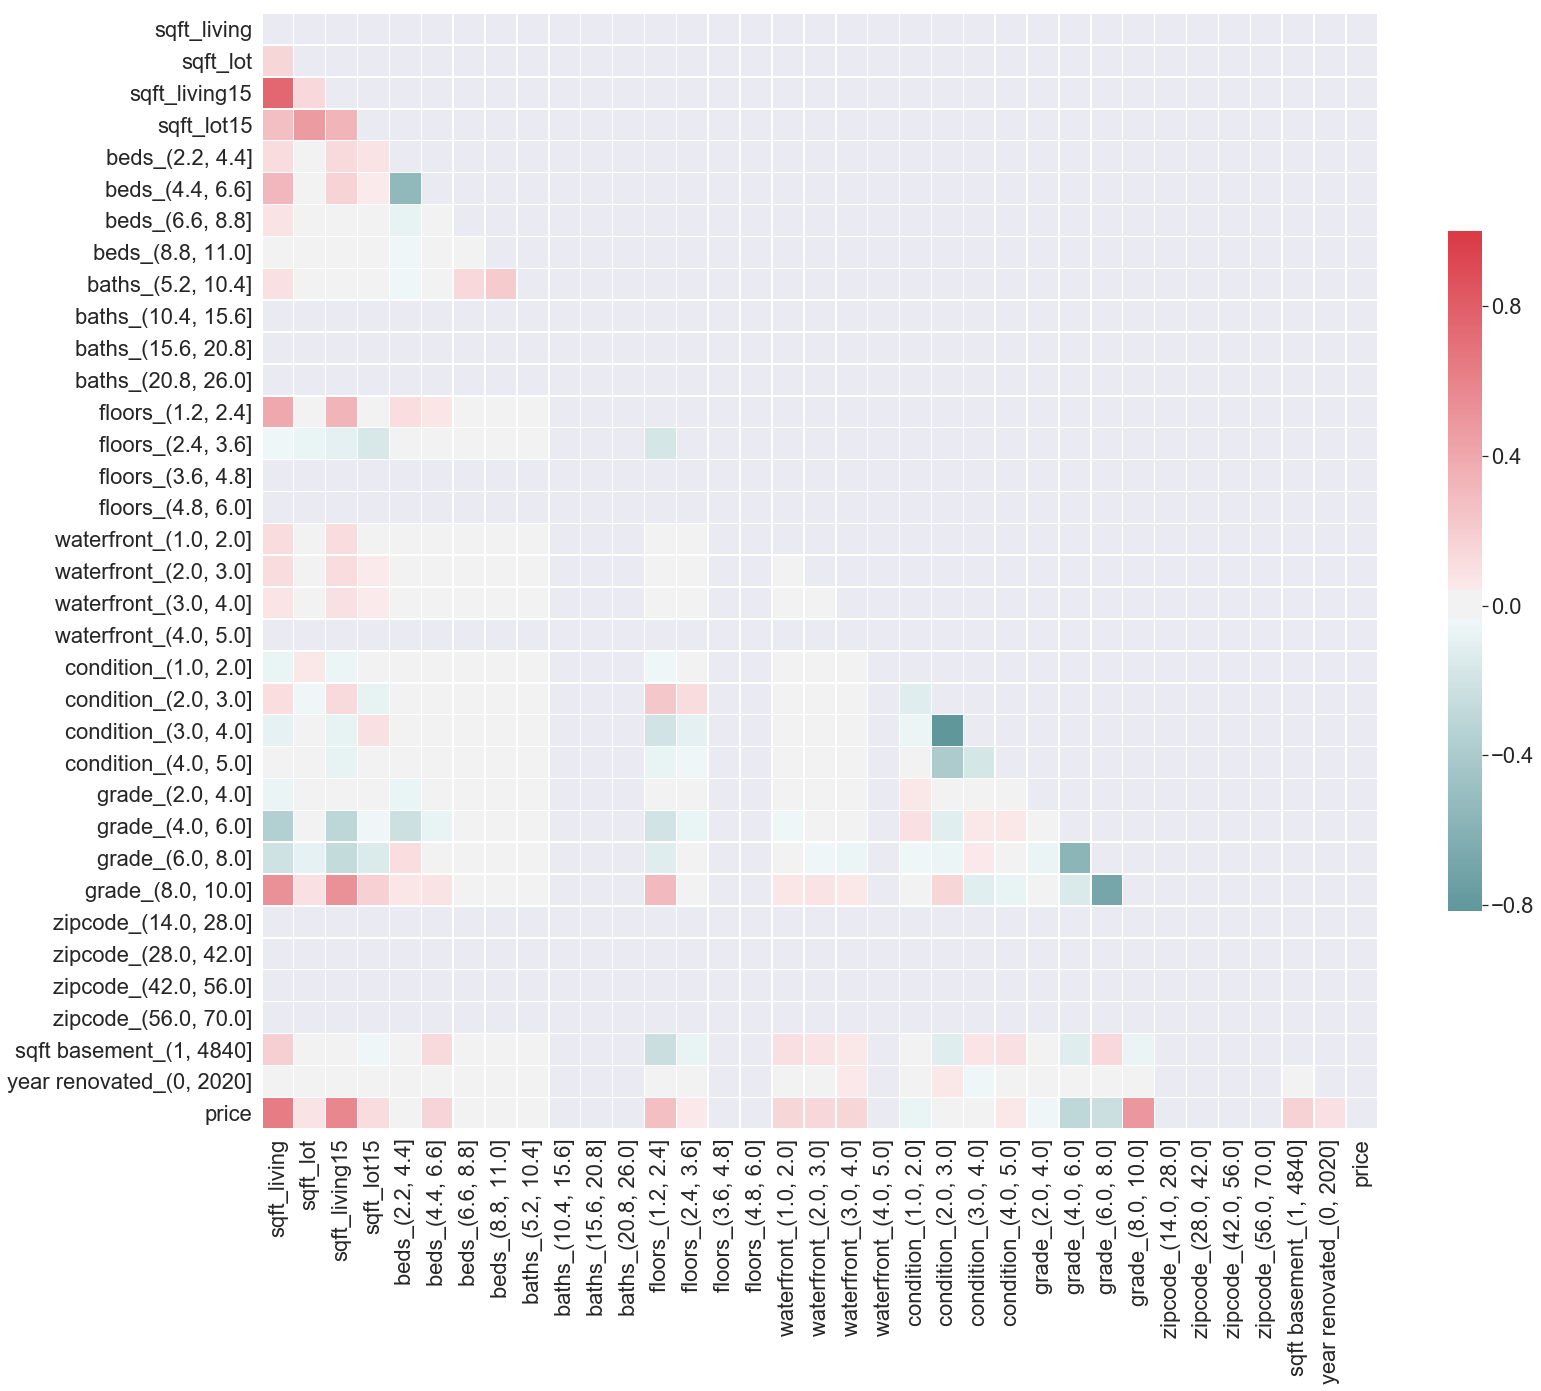

In [92]:
corr = final2.corr()
sns.set(font_scale=2)
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(25,25))

cmap = sns.diverging_palette(200, 10, as_cmap=True)


heatmap2 = sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})
'''
for i in heatmap2.get_xticklabels():
    i.set_rotation(45)
for i in heatmap2.get_yticklabels():
    i.set_rotation(45)'''

In [93]:
y = y
X = X


'''preds = "+".join(X.columns)
formula = y + "~" + preds
model = smf(formula= y, data= X).fit()'''


preds_int = sm.add_constant(X)
model = sm.OLS(y, preds_int).fit()
model.summary()

NameError: name 'sm' is not defined

You can see from the heatmap and our R^2 and R^2adj that we lost accountability by glossing over some useful details.  If we were to do a stepwise selection process here, my guess is that more columns would get knocked out for having high P values.

In [ ]:
final3 = final[final.price < 1000001]
a_few_more_houses = cleaned.shape[0] - final3.shape[0]
a_few_more_houses



In [ ]:
y = pd.DataFrame(final3.price)
X = final3.drop(['price'], axis=1)

preds_int = sm.add_constant(X)
model = sm.OLS(y, preds_int).fit()
model.summary()

In [ ]:
stepwise_X = X[returns]
num = 20
res_train_err = []
res_test_err = []
for i in range(num):
    Xtrain, Xtest, ytrain, ytest = train_test_split(stepwise_X, y, test_size = 0.25)
    linreg.fit(Xtrain, ytrain)
    y_hat_train = linreg.predict(Xtrain)
    y_hat_test = linreg.predict(Xtest)
    res_train_err.append(mean_squared_error(ytrain, y_hat_train))
    res_test_err.append(mean_squared_error(ytest, y_hat_test))
plt.scatter(list(range(num)), train_err, label='Training Error')
plt.scatter(list(range(num)), test_err, label='Testing Error')
plt.legend();

In [ ]:
stepwise_X.shape

In [ ]:
cv_20_results = np.mean(cross_val_score(linreg, stepwise_X, y, cv=20, scoring="neg_mean_squared_error"))
a = cv_20_results * -1
a = sqrt(a)
a

My stepwise function is likely out of date.  There could also be a change in R^2 values for these new varables given the new sample size.

In [ ]:
geo_data.shape

In [ ]:
### Make a kde scatter plot like I did with the lat long

# Set up the matplotlib figure
f, axes = plt.subplots(3, 3, figsize=(9, 9), sharex=True, sharey=True)

# Rotate the starting point around the cubehelix hue circle
for ax, s in zip(axes.flat, np.linspace(0, 3, 10)):

    # Create a cubehelix colormap to use with kdeplot
    cmap = sns.cubehelix_palette(start=s, light=1, as_cmap=True)

    # Generate and plot a random bivariate dataset
    x, y = rs.randn(2, 50)
    sns.kdeplot(x, y, cmap=cmap, shade=True, cut=5, ax=ax)
    ax.set(xlim=(-3, 3), ylim=(-3, 3))

f.tight_layout()